In [91]:
import seaborn as sns
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
#분류기
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
#딥러닝
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint


plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname='c:/Windows/Fonts/malgun.ttf').get_name()
rc('font', family=font_name)

import os
for dirname, _, filenames in os.walk('C:/Users/아이루디/Downloads/titanic'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

C:/Users/아이루디/Downloads/titanic\gender_submission.csv
C:/Users/아이루디/Downloads/titanic\test.csv
C:/Users/아이루디/Downloads/titanic\train.csv


In [3]:
train=pd.read_csv('C:/Users/아이루디/Downloads/titanic/train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#타이타닉 train  데이터의 정보 살펴보기
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
#타이타닉 train 데이터의 결측치 체크 
#Age, Cabin , Embarked 에 null 데이터가 존재한다.
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
print('데이터 수:',train.shape[0], '특성 수:',train.shape[1])

데이터 수: 891 특성 수: 12


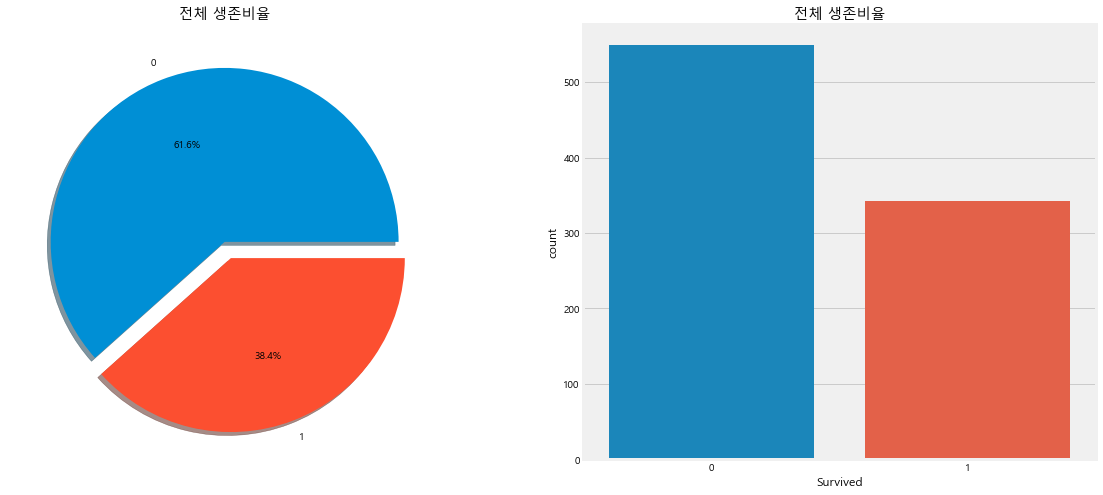

In [7]:
#일단 target인 생존 비율을 살펴보자.
f,ax=plt.subplots(1,2,figsize=(18,8))
train['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('전체 생존비율')
ax[0].set_ylabel('')
sns.countplot(x='Survived',data=train,ax=ax[1])
ax[1].set_title('전체 생존비율')
plt.show()

In [8]:
#성에 따른 생존 수 비교
train.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

In [9]:
pd.crosstab(train.Sex,train.Survived,margins=True).style.background_gradient(cmap='Blues')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


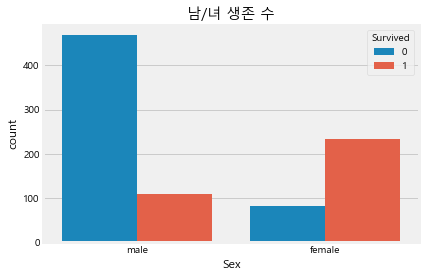

In [10]:
#데이터에는 male과 female로 분류
sns.countplot('Sex',hue='Survived',data=train)
plt.title("남/녀 생존 수")
plt.show()

In [11]:
#PClass
#pclass 에 따른 생존 수 나타내기
train.groupby(['Pclass','Survived'])['Survived'].count()

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

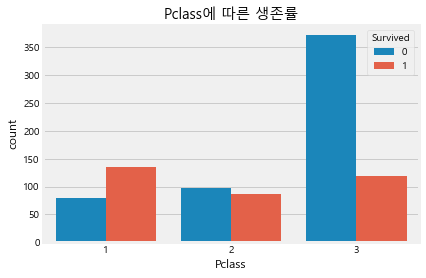

In [12]:
#Pclass에 따른 생존률도 다른 양상을 보인다.
#타겟값을 예측하는데 중요한 특성이라고 판단.
sns.countplot('Pclass',hue='Survived',data=train)
plt.title('Pclass에 따른 생존률')
plt.show()

In [13]:
#pclass 에 따른 생존률 수치로 확인해보기
pd.crosstab(train.Survived,train.Pclass,margins=True).style.background_gradient(cmap='Blues')

Pclass,1,2,3,All
Survived,,,,
0,80,97,372,549
1,136,87,119,342
All,216,184,491,891


In [14]:
#pclass와 성에 따른 생존률 살펴보기
pd.crosstab([train.Sex,train.Survived],train.Pclass,margins=True).style.background_gradient(cmap='Blues')

In [15]:
#Embarked에 따른 생존자 수 확인하기
train.groupby(['Embarked','Survived'])['Survived'].count()

Embarked  Survived
C         0            75
          1            93
Q         0            47
          1            30
S         0           427
          1           217
Name: Survived, dtype: int64

In [16]:
#데이터 결측치 2개존재.
#표로 확인하기
pd.crosstab(train.Survived,train.Embarked,margins=True).style.background_gradient(cmap='Blues')

Embarked,C,Q,S,All
Survived,,,,
0,75,47,427,549
1,93,30,217,340
All,168,77,644,889


In [17]:
#데이터 결측치 2개존재.
#지금까지 확인한 pclss ,sex,Embarked 에 따른 생존자 수 한번에 살펴보기
pd.crosstab([train.Embarked,train.Pclass],[train.Sex,train.Survived],margins=True).style.background_gradient(cmap='Blues')

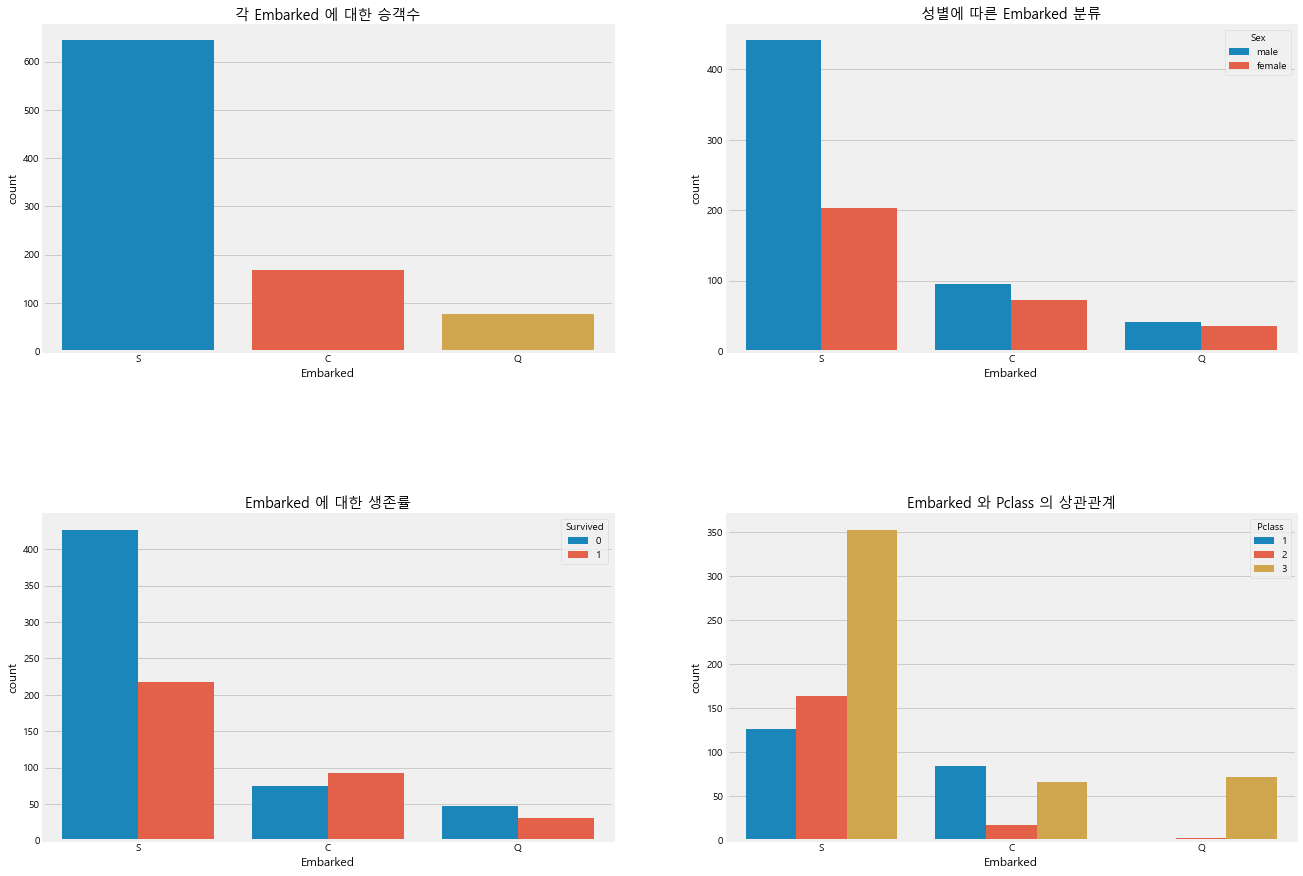

In [18]:
f,ax=plt.subplots(2,2,figsize=(20,15))
sns.countplot('Embarked',data=train,ax=ax[0,0])
ax[0,0].set_title('각 Embarked 에 대한 승객수')
sns.countplot('Embarked',hue='Sex',data=train,ax=ax[0,1])
ax[0,1].set_title('성별에 따른 Embarked 분류')
sns.countplot('Embarked',hue='Survived',data=train,ax=ax[1,0])
ax[1,0].set_title('Embarked 에 대한 생존률')
sns.countplot('Embarked',hue='Pclass',data=train,ax=ax[1,1])
ax[1,1].set_title('Embarked 와 Pclass 의 상관관계')
plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()

In [19]:
#데이터 결측치를 가장 빈도수가 많은 S 로 채워보기로 함.
train['Embarked'].fillna('S',inplace=True)

In [20]:
#데이터 결측없는 것 확인.
train.Embarked.isnull().any()

False

In [21]:
pd.crosstab(train.SibSp,train.Survived).style.background_gradient(cmap='Blues')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


In [22]:
pd.crosstab(train.SibSp,train.Pclass).style.background_gradient(cmap='Blues')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


In [23]:
pd.crosstab(train.Parch,train.Survived).style.background_gradient(cmap='Blues')

Survived,0,1
Parch,,
0,445,233
1,53,65
2,40,40
3,2,3
4,4,0
5,4,1
6,1,0


In [24]:
pd.crosstab(train.Parch,train.Pclass).style.background_gradient(cmap='Blues')

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


In [25]:
pd.crosstab(train.Pclass,[train.SibSp,train.Survived]).style.background_gradient(cmap='Blues')

In [26]:
pd.crosstab(train.Pclass,[train.Parch,train.Survived]).style.background_gradient(cmap='Blues')

In [27]:
#Sibsp와 Parch를 하나의 가족사이즈라는 새로운 특성으로 취급
train['Family_Size']=train['Parch']+train['SibSp']+1

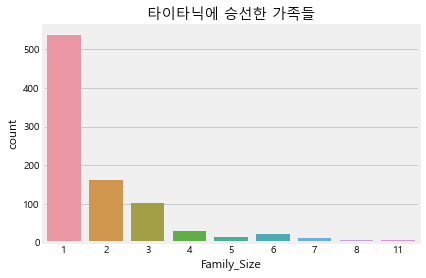

In [28]:
sns.countplot('Family_Size',data=train)
plt.title("타이타닉에 승선한 가족들")
plt.show()

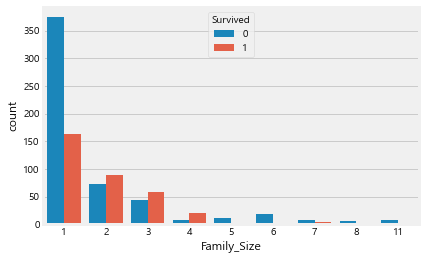

In [29]:
sns.countplot('Family_Size',hue="Survived",data=train)
plt.show()

In [30]:
train['Initial']=0
for i in train:
    train['Initial']=train.Name.str.extract('([A-Za-z]+)\.') #호칭 추출

In [31]:
pd.crosstab(train.Initial,train.Sex).T.style.background_gradient(cmap='Blues') #Checking the Initials with the Sex

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [32]:
print('가장 고연령은:',train['Age'].max())
print('가장 저연령은:',train['Age'].min())
print('Age의 평균은:',train['Age'].mean())

가장 고연령은: 80.0
가장 저연령은: 0.42
Age의 평균은: 29.69911764705882


In [33]:
train.groupby('Initial')['Age'].mean() #각 호칭의 평균 연령 측정

Initial
Capt        70.000000
Col         58.000000
Countess    33.000000
Don         40.000000
Dr          42.000000
Jonkheer    38.000000
Lady        48.000000
Major       48.500000
Master       4.574167
Miss        21.773973
Mlle        24.000000
Mme         24.000000
Mr          32.368090
Mrs         35.898148
Ms          28.000000
Rev         43.166667
Sir         49.000000
Name: Age, dtype: float64

In [34]:
#값이 한명인 것은 null 값이 없기 때문에 채워줄 필요가 없다.
#2개 이상인 것만 null이면 평균값으로 나이 채워주기
train.loc[(train.Age.isnull())&(train.Initial=='Col'),'Age']=33
train.loc[(train.Age.isnull())&(train.Initial=='Dr'),'Age']=42
train.loc[(train.Age.isnull())&(train.Initial=='Major'),'Age']=49
train.loc[(train.Age.isnull())&(train.Initial=='Master'),'Age']=5
train.loc[(train.Age.isnull())&(train.Initial=='Miss'),'Age']=22
train.loc[(train.Age.isnull())&(train.Initial=='Mlle'),'Age']=24
train.loc[(train.Age.isnull())&(train.Initial=='Mr'),'Age']=32
train.loc[(train.Age.isnull())&(train.Initial=='Mrs'),'Age']=36
train.loc[(train.Age.isnull())&(train.Initial=='Rev'),'Age']=43

In [35]:
train.Age.isnull().any()  #Age 특성 null값 제거

False

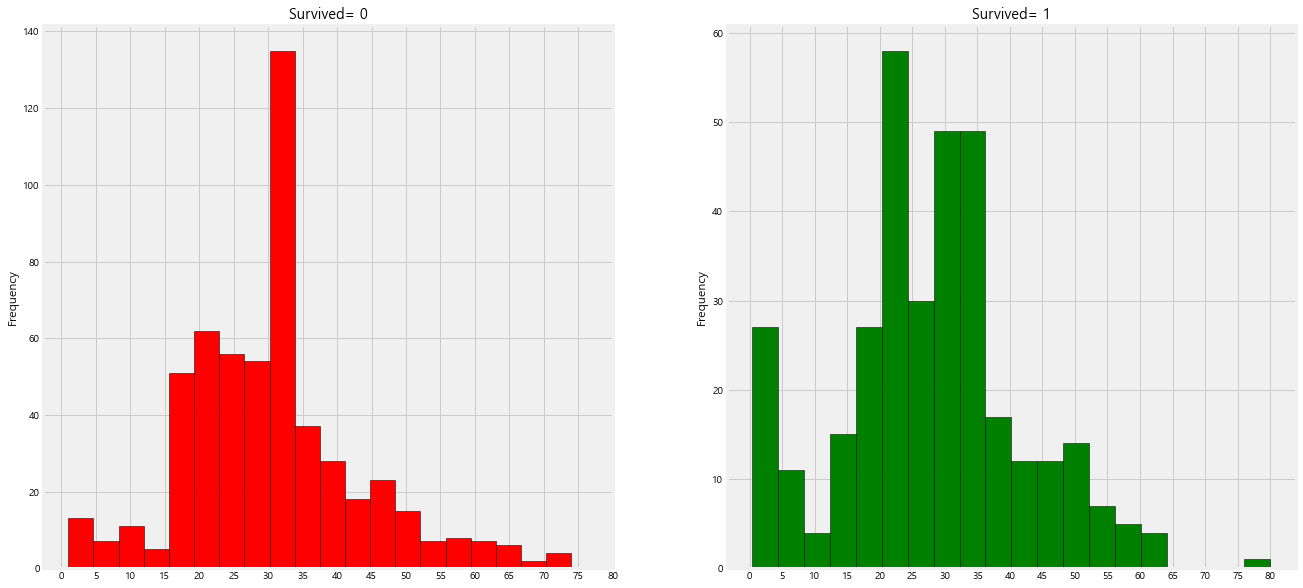

In [36]:
#나이에 따른 생존률 비교
f,ax=plt.subplots(1,2,figsize=(20,10))
train[train['Survived']==0].Age.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red')
ax[0].set_title('Survived= 0')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)
train[train['Survived']==1].Age.plot.hist(ax=ax[1],color='green',bins=20,edgecolor='black')
ax[1].set_title('Survived= 1')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)
plt.show()

In [37]:
train['Age_group']=0
train.loc[train['Age']<=9,'Age_group']=0
train.loc[(train['Age']>=10)&(train['Age']<20),'Age_group']=1
train.loc[(train['Age']>=20)&(train['Age']<30),'Age_group']=2
train.loc[(train['Age']>=30)&(train['Age']<40),'Age_group']=3
train.loc[(train['Age']>=40)&(train['Age']<50),'Age_group']=4
train.loc[(train['Age']>=50)&(train['Age']<60),'Age_group']=5
train.loc[(train['Age']>=60),'Age_group']=6
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size,Initial,Age_group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,Mr,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,Mrs,3


In [38]:
#Fare 특성 살펴보기
print('가장 비싼 가격은:',train['Fare'].max())
print('가장 싼 가격은:',train['Fare'].min())
print('Fare의 평균은:',train['Fare'].mean())

가장 비싼 가격은: 512.3292
가장 싼 가격은: 0.0
Fare의 평균은: 32.2042079685746


In [39]:
train['Fare_Range']=pd.qcut(train['Fare'],4)
train.groupby(['Fare_Range'])['Survived'].mean().to_frame().style.background_gradient(cmap='Blues')

,Survived
Fare_Range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


In [40]:
train['Fare_group']=0
train.loc[train['Fare']<=7.91,'Fare_group']=0
train.loc[(train['Fare']>7.91)&(train['Fare']<=14.454),'Fare_group']=1
train.loc[(train['Fare']>14.454)&(train['Fare']<=31),'Fare_group']=2
train.loc[(train['Fare']>31)&(train['Fare']<=513),'Fare_group']=3

In [41]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size,Initial,Age_group,Fare_Range,Fare_group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,Mr,2,"(-0.001, 7.91]",0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,Mrs,3,"(31.0, 512.329]",3


In [42]:
#간단하게 남 / 여 는 0,1 로 대체
# EMbarked 는 각각 0,1,2로 대체
train['Sex'].replace(['male','female'],[0,1],inplace=True)
train['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)
train['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)
train['Initial'].replace(['Mr','Mrs','Miss','Master','Other'],[0,1,2,3,4],inplace=True)

In [43]:
X = train.drop(['Name','Age','Ticket','Fare','Cabin','PassengerId','Survived','Fare_Range'],axis=1)
y = train['Survived']

In [44]:
#새로 추출한 데이터 확인
X.head(5)

,Pclass,Sex,SibSp,Parch,Embarked,Family_Size,Initial,Age_group,Fare_group
0,3,0,1,0,0,2,0,2,0
1,1,1,1,0,1,2,1,3,3
2,3,1,0,0,0,1,2,2,1
3,1,1,1,0,0,2,1,3,3
4,3,0,0,0,0,1,0,3,1


In [45]:
#데이터 확인
y.value_counts()

0    549
1    342
Name: Survived, dtype: int64

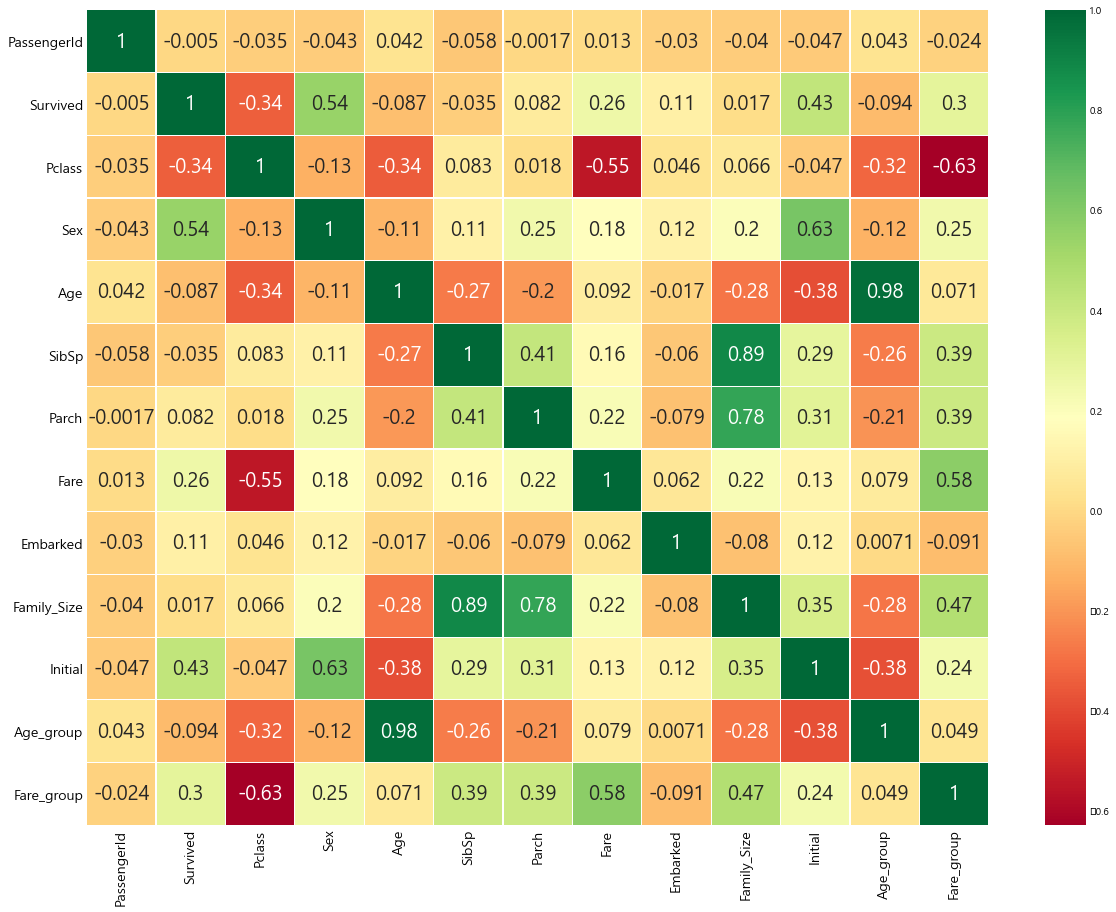

In [46]:
sns.heatmap(train.corr(),annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':20})
fig=plt.gcf()
fig.set_size_inches(18,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [47]:
#데이터 분류하기
#표준 스케일러로 데이터 전처리 해주기
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, stratify=y,random_state=0)
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [48]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train_scaled,y_train)
print("k최근접 이웃 정확도: {:.3f}".format(knn.score(X_test_scaled,y_test)))

k최근접 이웃 정확도: 0.843


In [49]:
#로지스틱
log = LogisticRegression(max_iter=1000)
log.fit(X_train_scaled, y_train)
print("LOG의 정확도:{:.3f}".format(log.score(X_test_scaled,y_test)))

LOG의 정확도:0.821


In [50]:
#가우시안 NB
gnb=GaussianNB()
gnb.fit(X_train_scaled,y_train)
print("가우시안모델의 정확도:{:.3f}".format(gnb.score(X_test_scaled,y_test)))

가우시안모델의 정확도:0.810


In [51]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train_scaled, y_train)
print("결정트리모델의 정확도: {:.3f}".format(dtc.score(X_test_scaled,y_test)))

결정트리모델의 정확도: 0.810


In [52]:
rfc = RandomForestClassifier(n_estimators=100) 
rfc.fit(X_train_scaled, y_train)
print("랜덤 포레스트모델 정확도: {:.3f}".format(rfc.score(X_test_scaled,y_test)))

랜덤 포레스트모델 정확도: 0.806


In [53]:
GBC = GradientBoostingClassifier(max_depth=5, n_estimators=100, learning_rate=0.1, random_state=0)
GBC.fit(X_train_scaled, y_train)
print("그라디언트 부스트모델 정확도:{:.3f}".format(GBC.score(X_test_scaled,y_test)))

그라디언트 부스트모델 정확도:0.821


In [54]:
from sklearn.ensemble import BaggingClassifier
bag=BaggingClassifier(LogisticRegression(),random_state=0,n_estimators=100)
bag.fit(X_train_scaled,y_train)
print("배깅모델 정확도:{:.3f}".format(bag.score(X_test_scaled,y_test)))

배깅모델 정확도:0.825


In [55]:
ada=AdaBoostClassifier(n_estimators=100,random_state=0,learning_rate=0.1)
ada.fit(X_train_scaled,y_train)
print("Adaboost모델 정확도: {:.3f}".format(ada.score(X_test_scaled,y_test)))

Adaboost모델 정확도: 0.836


In [56]:
xgb = XGBClassifier()
xgb.fit(X_train_scaled, y_train)
print("Xgboost모델 정확도: {:.3f}".format(xgb.score(X_test_scaled,y_test)))

[18:14:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Xgboost모델 정확도: 0.806


In [57]:
svc=SVC()
svc.fit(X_train_scaled,y_train)
print("SVC의 정확도:{:.3f}".format(svc.score(X_test_scaled,y_test)))

SVC의 정확도:0.832


In [58]:
mlp = MLPClassifier(solver='lbfgs',hidden_layer_sizes=[4,3],max_iter=1000, random_state =0)
mlp.fit(X_train_scaled,y_train)
print("MLP의 정확도:{:.3f}".format(mlp.score(X_test_scaled,y_test)))

MLP의 정확도:0.828


[20:24:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


<AxesSubplot:title={'center':'분류기 성능'}, xlabel='Accuracy', ylabel='Classifier'>

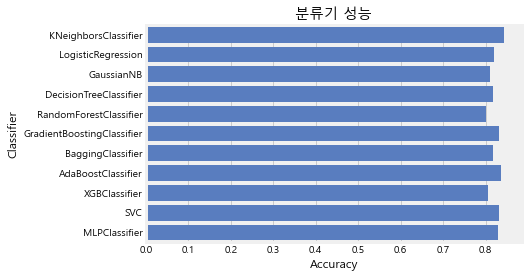

In [73]:
classifiers = [
    KNeighborsClassifier(n_neighbors=7),
    LogisticRegression(),
    GaussianNB(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    BaggingClassifier(LogisticRegression(),random_state=0,n_estimators=500),
    AdaBoostClassifier(n_estimators=200,random_state=0,learning_rate=0.1),
    XGBClassifier(),
    SVC(probability=True),
    MLPClassifier(solver='lbfgs',hidden_layer_sizes=[4,3],max_iter=1000, random_state =0)
    ]

log_cols = ["Classifier", "Accuracy"]
log = pd.DataFrame(columns=log_cols)

acc_dict = {}


for clf in classifiers:
	name = clf.__class__.__name__
	clf.fit(X_train_scaled, y_train)
	test_score = clf.score(X_test_scaled,y_test)
	if name in acc_dict:
		acc_dict[name] += test_score
	else:
		acc_dict[name] = test_score

for clf in acc_dict:
	log_entry = pd.DataFrame([[clf, acc_dict[clf]]], columns=log_cols)
	log = log.append(log_entry)

plt.xlabel('Test Score')
plt.title('분류기 성능')

sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")

In [60]:
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import cross_val_predict 
kfold = KFold(n_splits=10, random_state=0) # k=10, 10등분
xyz=[]
accuracy=[]
std=[]
classifiers=['KNN','Logistic Regression','Naive Bayes','Decision Tree','Random Forest','Gradient Boosting','Bagging','Ada boost','XGB','Rbf SVC','MLP']
models=[KNeighborsClassifier(n_neighbors=8),
    LogisticRegression(C=0.1, max_iter=1000),
    GaussianNB(),
    DecisionTreeClassifier(max_depth=4, random_state=0),
    RandomForestClassifier(max_depth=4,n_estimators=500,random_state=0),
    GradientBoostingClassifier(learning_rate=0.01, max_depth=2, n_estimators=300,
                           random_state=0),
    BaggingClassifier(LogisticRegression(),random_state=0,n_estimators=500),
    AdaBoostClassifier(learning_rate=0.01, n_estimators=900, random_state=0),
    XGBClassifier(),
    SVC(kernel='rbf',C=10,gamma=0.01),
    MLPClassifier(activation='tanh', alpha=1.0, hidden_layer_sizes=5, max_iter=1000,
              random_state=0)]
for i in models:
    model = i
    cv_result = cross_val_score(model,X,y, cv = kfold, scoring = "accuracy")
    cv_result=cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
new_models_dataframe2=pd.DataFrame({'평균':xyz,'표준 편차':std},index=classifiers)       
new_models_dataframe2

[18:20:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:20:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:20:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:20:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

,평균,표준 편차
KNN,0.809276,0.034264
Logistic Regression,0.804694,0.020388
Naive Bayes,0.789026,0.029434
Decision Tree,0.830524,0.036747
Random Forest,0.832784,0.037693
Gradient Boosting,0.833895,0.037528
Bagging,0.794619,0.019411
Ada boost,0.830524,0.034624
XGB,0.812622,0.030594
Rbf SVC,0.823808,0.038209


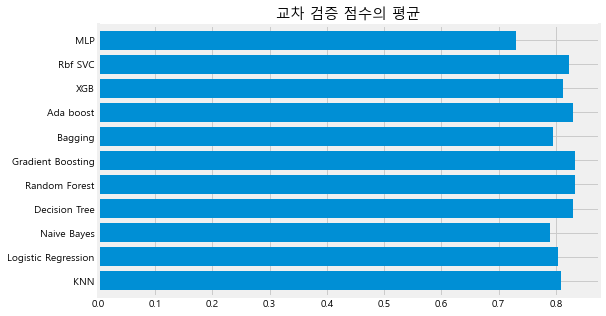

In [61]:
new_models_dataframe2['평균'].plot.barh(width=0.8)
plt.title('교차 검증 점수의 평균')
fig=plt.gcf()
fig.set_size_inches(8,5)
plt.show()

In [62]:
from sklearn.ensemble import VotingClassifier
vclf=VotingClassifier(estimators=[('KNN',KNeighborsClassifier(n_neighbors=11)),
                                              ('RBF',SVC(probability=True,kernel='rbf',C=0.5,gamma=0.1)),
                                              ('RFor',RandomForestClassifier(n_estimators=500,random_state=0)),
                                              ('LR',LogisticRegression(C=0.05)),
                                              ('DT',DecisionTreeClassifier(random_state=0)),
                                              ('NB',GaussianNB()),
                                              ('svc',SVC(kernel='linear',probability=True))
                                             ], 
                       voting='soft').fit(X_train_scaled,y_train)
print('voting 모델의 점수:',(vclf.score(X_test_scaled,y_test)))
cross=cross_val_score(vclf,X,y, cv = 10,scoring = "accuracy")
print('교차 검증 점수:',cross.mean())

voting 모델의 점수: 0.8470149253731343
교차 검증 점수: 0.8216104868913858


In [75]:
param_grid = [{'kernel':['rbf'],
              'C':[0.001,0.01,0.1,0.5,1.0,10,100],
              'gamma':[0.001,0.01,0.1,0.5,1.0,10,100]},
             {'kernel':['linear'],
             'C':[0.001,0.01,0.1,0.5,1.0,10,100]}]
gd=GridSearchCV(SVC(),param_grid,cv=5,verbose=True)
gd.fit(X_train_scaled,y_train)
print(gd.best_score_)
print(gd.best_estimator_)
print(gd.score(X_test_scaled,y_test))

Fitting 5 folds for each of 56 candidates, totalling 280 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.8266451612903225
SVC(C=10, gamma=0.01)
0.832089552238806


[Parallel(n_jobs=1)]: Done 280 out of 280 | elapsed:    5.7s finished


In [78]:
param_grid = {'n_estimators':range(100,1000,100),
             'max_depth':range(1,10,1)}
gd=GridSearchCV(RandomForestClassifier(random_state=0),param_grid,cv=5,verbose=True)
gd.fit(X_train_scaled,y_train)
print(gd.best_score_)
print(gd.best_estimator_)
print(gd.score(X_test_scaled,y_test))

Fitting 5 folds for each of 81 candidates, totalling 405 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 405 out of 405 | elapsed:  5.1min finished


0.8314838709677419
RandomForestClassifier(max_depth=4, n_estimators=500, random_state=0)
0.8395522388059702


In [80]:
param_grid = {'n_estimators':range(100,1000,100),
             'learning_rate':[0.01,0.1,0.5,1.0,10]}
gd=GridSearchCV(AdaBoostClassifier(random_state=0),param_grid,cv=5,verbose=True)
gd.fit(X_train_scaled,y_train)
print(gd.best_score_)
print(gd.best_estimator_)
print(gd.score(X_test_scaled,y_test))

Fitting 5 folds for each of 45 candidates, totalling 225 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 225 out of 225 | elapsed:  3.2min finished


0.8298580645161291
AdaBoostClassifier(learning_rate=0.01, n_estimators=900, random_state=0)
0.835820895522388


In [82]:
param_grid = {'n_estimators':range(100,1000,100),
             'learning_rate' : [0.01,0.1,0.5,1.0,10],
             'max_depth' : range(1,6,1)}
gd=GridSearchCV(GradientBoostingClassifier(random_state=0),param_grid,cv=5,verbose=True)
gd.fit(X_train_scaled,y_train)
print(gd.best_score_)
print(gd.best_estimator_)
print(gd.score(X_test_scaled,y_test))

Fitting 5 folds for each of 225 candidates, totalling 1125 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1125 out of 1125 | elapsed:  7.8min finished


0.8314709677419355
GradientBoostingClassifier(learning_rate=0.01, max_depth=2, n_estimators=300,
                           random_state=0)
0.8395522388059702


In [83]:
param_grid = {'max_iter':[1000,2000,3000,4000,5000],
             'C' : [0.01,0.1,0.5,1.0,10],
             }
gd=GridSearchCV(LogisticRegression(),param_grid,cv=5,verbose=True)
gd.fit(X_train_scaled,y_train)
print(gd.best_score_)
print(gd.best_estimator_)
print(gd.score(X_test_scaled,y_test))

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.7945548387096772
LogisticRegression(C=0.1, max_iter=1000)
0.8208955223880597


[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:    0.5s finished


In [86]:
param_grid = { 'activation':['identity','logistic','tanh','relu'],
              'alpha' : [0.01,0.1,0.5,1.0,10],
              'solver' : ['lgfgs','sgd','adam'],
              'hidden_layer_sizes' : [1,2,3,4,5]
            }
gd=GridSearchCV(MLPClassifier(max_iter=1000,random_state=0),param_grid,cv=5,verbose=True)
gd.fit(X_train_scaled,y_train)
print(gd.best_score_)
print(gd.best_estimator_)
print(gd.score(X_test_scaled,y_test))

Fitting 5 folds for each of 300 candidates, totalling 1500 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1500 out of 1500 | elapsed:  9.3min finished


0.8218451612903225
MLPClassifier(activation='tanh', alpha=1.0, hidden_layer_sizes=5, max_iter=1000,
              random_state=0)
0.832089552238806


In [87]:
param_grid = {'n_neighbors':[1,2,3,4,5,6,7,8,9,10]}
gd=GridSearchCV(KNeighborsClassifier(),param_grid,cv=5,verbose=True)
gd.fit(X_train_scaled,y_train)
print(gd.best_score_)
print(gd.best_estimator_)
print(gd.score(X_test_scaled,y_test))

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.8154451612903226
KNeighborsClassifier(n_neighbors=8)
0.8246268656716418


[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.3s finished


In [89]:
param_grid = {'max_depth' : [1,2,3,4,5,6,7,8,9,10]}
gd=GridSearchCV(DecisionTreeClassifier(random_state=0),param_grid,cv=5,verbose=True)
gd.fit(X_train_scaled,y_train)
print(gd.best_score_)
print(gd.best_estimator_)
print(gd.score(X_test_scaled,y_test))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
0.8217806451612903
DecisionTreeClassifier(max_depth=4, random_state=0)
0.8246268656716418


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished


In [63]:
param_grid = {'n_estimators':range(100,1000,100),
             'learning_rate' : [0.01,0.1,0.5,1.0,10],
             }
gd=GridSearchCV(XGBClassifier(random_state=0),param_grid,cv=5,verbose=True)
gd.fit(X_train_scaled,y_train)
print(gd.best_score_)
print(gd.best_estimator_)
print(gd.score(X_test_scaled,y_test))

Fitting 5 folds for each of 45 candidates, totalling 225 fits
[17:58:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:58:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:58:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.



[17:58:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:58:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:58:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:58:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_re

[17:58:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:58:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:58:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:58:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[17:58:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:58:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:58:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:58:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[17:59:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:59:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:59:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:59:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[17:59:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:59:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:59:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:59:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[17:59:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:59:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:59:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:59:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[17:59:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:59:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:59:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:59:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[17:59:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:59:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:59:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:59:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[18:00:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:00:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:00:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:00:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[Parallel(n_jobs=1)]: Done 225 out of 225 | elapsed:  1.5min finished


[18:00:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.8106064516129032
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=500, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
0.835820895522388


[20:23:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


<AxesSubplot:title={'center':'분류기 성능'}, xlabel='Accuracy', ylabel='Classifier'>

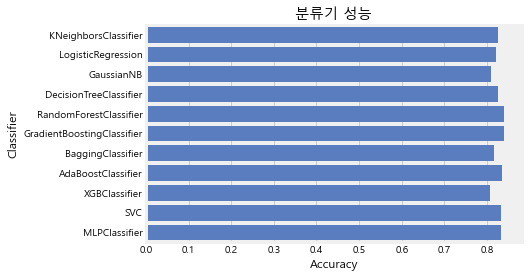

In [72]:
classifiers = [
    KNeighborsClassifier(n_neighbors=8),
    LogisticRegression(C=0.1, max_iter=1000),
    GaussianNB(),
    DecisionTreeClassifier(max_depth=4, random_state=0),
    RandomForestClassifier(max_depth=4,n_estimators=500,random_state=0),
    GradientBoostingClassifier(learning_rate=0.01, max_depth=2, n_estimators=300,
                           random_state=0),
    BaggingClassifier(LogisticRegression(),random_state=0,n_estimators=500),
    AdaBoostClassifier(learning_rate=0.01, n_estimators=900, random_state=0),
    XGBClassifier(),
    SVC(kernel='rbf',C=10,gamma=0.01),
    MLPClassifier(activation='tanh', alpha=1.0, hidden_layer_sizes=5, max_iter=1000,
              random_state=0)
    ]

log_cols = ["Classifier", "Accuracy"]
log = pd.DataFrame(columns=log_cols)

acc_dict = {}


for clf in classifiers:
	name = clf.__class__.__name__
	clf.fit(X_train_scaled, y_train)
	test_score = clf.score(X_test_scaled,y_test)
	if name in acc_dict:
		acc_dict[name] += test_score
	else:
		acc_dict[name] = test_score

for clf in acc_dict:
	log_entry = pd.DataFrame([[clf, acc_dict[clf]]], columns=log_cols)
	log = log.append(log_entry)

plt.xlabel('Test Score')
plt.title('분류기 성능')

sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")

[20:28:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:28:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:28:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:28:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

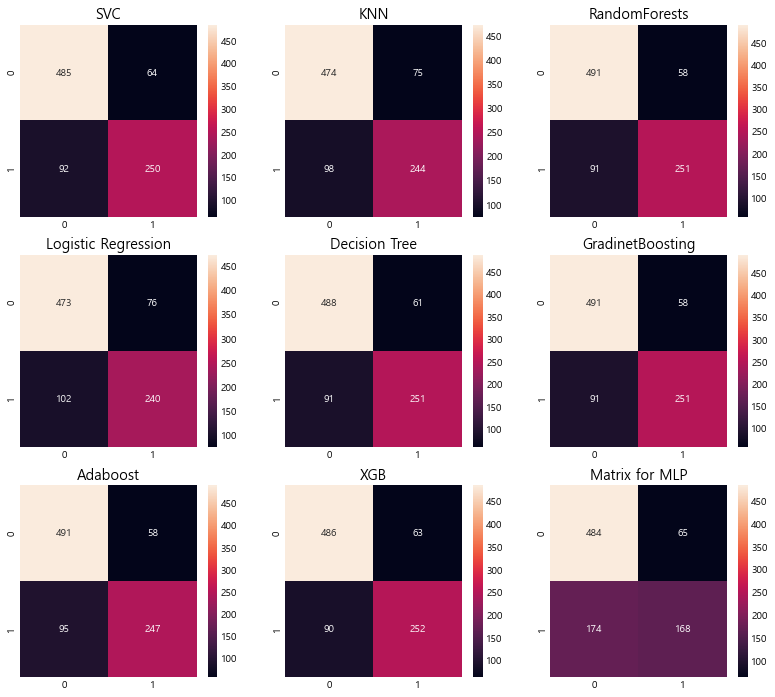

In [74]:
#ROC 그래프, 딥러닝, 
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
f,ax=plt.subplots(3,3,figsize=(12,12))
y_pred = cross_val_predict(SVC(kernel='rbf',C=10,gamma=0.01),X,y,cv=10)
sns.heatmap(confusion_matrix(y,y_pred),ax=ax[0,0],annot=True,fmt='2.0f')
ax[0,0].set_title('SVC')
y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors=7),X,y,cv=10)
sns.heatmap(confusion_matrix(y,y_pred),ax=ax[0,1],annot=True,fmt='2.0f')
ax[0,1].set_title('KNN')
y_pred = cross_val_predict(RandomForestClassifier(max_depth=4,n_estimators=500,random_state=0),X,y,cv=10)
sns.heatmap(confusion_matrix(y,y_pred),ax=ax[0,2],annot=True,fmt='2.0f')
ax[0,2].set_title('RandomForests')
y_pred = cross_val_predict(LogisticRegression(C=0.1, max_iter=1000),X,y,cv=10)
sns.heatmap(confusion_matrix(y,y_pred),ax=ax[1,0],annot=True,fmt='2.0f')
ax[1,0].set_title('Logistic Regression')
y_pred = cross_val_predict(DecisionTreeClassifier(max_depth=4, random_state=0),X,y,cv=10)
sns.heatmap(confusion_matrix(y,y_pred),ax=ax[1,1],annot=True,fmt='2.0f')
ax[1,1].set_title('Decision Tree')
y_pred = cross_val_predict(GradientBoostingClassifier(learning_rate=0.01, max_depth=2, n_estimators=300,
                           random_state=0),X,y,cv=10)
sns.heatmap(confusion_matrix(y,y_pred),ax=ax[1,2],annot=True,fmt='2.0f')
ax[1,2].set_title('GradinetBoosting')
y_pred = cross_val_predict(AdaBoostClassifier(learning_rate=0.01, n_estimators=900, random_state=0),X,y,cv=10)
sns.heatmap(confusion_matrix(y,y_pred),ax=ax[2,0],annot=True,fmt='2.0f')
ax[2,0].set_title('Adaboost')
y_pred = cross_val_predict(XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=6,
              min_child_weight=1,monotone_constraints=(),
              n_estimators=500, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None),X,y,cv=10)
sns.heatmap(confusion_matrix(y,y_pred),ax=ax[2,1],annot=True,fmt='2.0f')
ax[2,1].set_title('XGB')
y_pred = cross_val_predict(MLPClassifier(activation='tanh', alpha=1.0, hidden_layer_sizes=5, max_iter=1000,
              random_state=0),X,y,cv=10)
sns.heatmap(confusion_matrix(y,y_pred),ax=ax[2,2],annot=True,fmt='2.0f')
ax[2,2].set_title('Matrix for MLP')

plt.subplots_adjust(hspace=0.2,wspace=0.2)
plt.show()

In [98]:
from sklearn.metrics import roc_curve

rf = RandomForestClassifier(max_depth=4,n_estimators=500,random_state=0)
gb = GradientBoostingClassifier(learning_rate=0.01, max_depth=2, n_estimators=300,random_state=0)

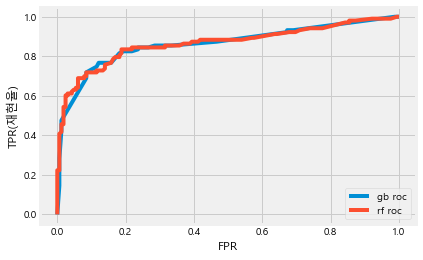

In [106]:
rf.fit(X_train_scaled,y_train)
fpr_rf,tpr_rf,thresholds_rf = roc_curve(y_test, rf.predict_proba(X_test_scaled)[:,1])

gb.fit(X_train_scaled,y_train)
fpr_gb,tpr_gb,thresholds_gb = roc_curve(y_test, gb.predict_proba(X_test_scaled)[:,1])

plt.plot(fpr_gb,tpr_gb, label='gb roc')
plt.plot(fpr_rf,tpr_rf, label='rf roc')

plt.xlabel("FPR")
plt.ylabel("TPR(재현율)")
plt.legend(loc=4)

In [108]:
from sklearn.metrics import roc_auc_score
rf_auc = roc_auc_score(y_test,rf.predict_proba(X_test_scaled)[:,1])
gb_auc = roc_auc_score(y_test,gb.predict_proba(X_test_scaled)[:,1])
print("랜덤 포레스트의 AUC:{:.3f}".format(rf_auc))
print("GradientBoosting의 AUC:{:.3f}".format(gb_auc))

랜덤 포레스트의 AUC:0.866
GradientBoosting의 AUC:0.863


In [65]:
#딥러닝이용
seed = 0
np.random.seed(seed)
tf.random.set_seed(seed)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, stratify=y,random_state=seed)

In [82]:
model = Sequential()

model.add(Dense(30, input_dim=9, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [83]:
model.compile(loss="mean_squared_error", optimizer='adam', metrics = ['accuracy'])
model.fit(X_train,y_train,epochs=100, batch_size=10, verbose=2)

Epoch 1/100
63/63 - 1s - loss: 0.2961 - accuracy: 0.4526
Epoch 2/100
63/63 - 0s - loss: 0.2087 - accuracy: 0.7143
Epoch 3/100
63/63 - 0s - loss: 0.1758 - accuracy: 0.7801
Epoch 4/100
63/63 - 0s - loss: 0.1558 - accuracy: 0.8042
Epoch 5/100
63/63 - 0s - loss: 0.1466 - accuracy: 0.8074
Epoch 6/100
63/63 - 0s - loss: 0.1428 - accuracy: 0.8170
Epoch 7/100
63/63 - 0s - loss: 0.1406 - accuracy: 0.8138
Epoch 8/100
63/63 - 0s - loss: 0.1391 - accuracy: 0.8074
Epoch 9/100
63/63 - 0s - loss: 0.1380 - accuracy: 0.8090
Epoch 10/100
63/63 - 0s - loss: 0.1373 - accuracy: 0.8122
Epoch 11/100
63/63 - 0s - loss: 0.1366 - accuracy: 0.8026
Epoch 12/100
63/63 - 0s - loss: 0.1354 - accuracy: 0.8090
Epoch 13/100
63/63 - 0s - loss: 0.1340 - accuracy: 0.8154
Epoch 14/100
63/63 - 0s - loss: 0.1338 - accuracy: 0.8138
Epoch 15/100
63/63 - 0s - loss: 0.1325 - accuracy: 0.8234
Epoch 16/100
63/63 - 0s - loss: 0.1330 - accuracy: 0.8122
Epoch 17/100
63/63 - 0s - loss: 0.1325 - accuracy: 0.8122
Epoch 18/100
63/63 - 0s

In [84]:
print("\n Accuracy: %.4f" % (model.evaluate(X_test, y_test)[1])) 
print("\n loss: %.4f" % (model.evaluate(X, y)[0]))

9/9 [==============================] - 0s 942us/step - loss: 0.1340 - accuracy: 0.8134

 Accuracy: 0.8134
28/28 [==============================] - 0s 650us/step - loss: 0.1223 - accuracy: 0.8305

 loss: 0.1223


In [85]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 30)                300       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 31        
Total params: 331
Trainable params: 331
Non-trainable params: 0
_________________________________________________________________


Epoch 1/3500
1/1 [==============================] - 0s 101ms/step - loss: 0.1039 - accuracy: 0.8514 - val_loss: 0.1305 - val_accuracy: 0.8160
Epoch 2/3500
1/1 [==============================] - 0s 44ms/step - loss: 0.1039 - accuracy: 0.8514 - val_loss: 0.1305 - val_accuracy: 0.8160
Epoch 3/3500
1/1 [==============================] - 0s 45ms/step - loss: 0.1039 - accuracy: 0.8514 - val_loss: 0.1305 - val_accuracy: 0.8160
Epoch 4/3500
1/1 [==============================] - 0s 42ms/step - loss: 0.1039 - accuracy: 0.8514 - val_loss: 0.1304 - val_accuracy: 0.8160
Epoch 5/3500
1/1 [==============================] - 0s 53ms/step - loss: 0.1039 - accuracy: 0.8514 - val_loss: 0.1304 - val_accuracy: 0.8160
Epoch 6/3500
1/1 [==============================] - 0s 46ms/step - loss: 0.1039 - accuracy: 0.8514 - val_loss: 0.1305 - val_accuracy: 0.8160
Epoch 7/3500
1/1 [==============================] - 0s 43ms/step - loss: 0.1039 - accuracy: 0.8514 - val_loss: 0.1305 - val_accuracy: 0.8160
Epoch 8/3500

Epoch 59/3500
1/1 [==============================] - 0s 42ms/step - loss: 0.1035 - accuracy: 0.8514 - val_loss: 0.1305 - val_accuracy: 0.8160
Epoch 60/3500
1/1 [==============================] - 0s 42ms/step - loss: 0.1035 - accuracy: 0.8514 - val_loss: 0.1305 - val_accuracy: 0.8160
Epoch 61/3500
1/1 [==============================] - 0s 44ms/step - loss: 0.1035 - accuracy: 0.8514 - val_loss: 0.1305 - val_accuracy: 0.8160
Epoch 62/3500
1/1 [==============================] - 0s 42ms/step - loss: 0.1035 - accuracy: 0.8514 - val_loss: 0.1305 - val_accuracy: 0.8160
Epoch 63/3500
1/1 [==============================] - 0s 45ms/step - loss: 0.1035 - accuracy: 0.8514 - val_loss: 0.1305 - val_accuracy: 0.8160
Epoch 64/3500
1/1 [==============================] - 0s 42ms/step - loss: 0.1035 - accuracy: 0.8514 - val_loss: 0.1305 - val_accuracy: 0.8160
Epoch 65/3500
1/1 [==============================] - 0s 41ms/step - loss: 0.1035 - accuracy: 0.8514 - val_loss: 0.1305 - val_accuracy: 0.8160
Epoch 

1/1 [==============================] - 0s 51ms/step - loss: 0.1027 - accuracy: 0.8514 - val_loss: 0.1304 - val_accuracy: 0.8160
Epoch 174/3500
1/1 [==============================] - 0s 43ms/step - loss: 0.1027 - accuracy: 0.8514 - val_loss: 0.1304 - val_accuracy: 0.8160
Epoch 175/3500
1/1 [==============================] - 0s 43ms/step - loss: 0.1027 - accuracy: 0.8514 - val_loss: 0.1304 - val_accuracy: 0.8160
Epoch 176/3500
1/1 [==============================] - 0s 40ms/step - loss: 0.1027 - accuracy: 0.8514 - val_loss: 0.1304 - val_accuracy: 0.8160
Epoch 177/3500
1/1 [==============================] - 0s 44ms/step - loss: 0.1027 - accuracy: 0.8514 - val_loss: 0.1304 - val_accuracy: 0.8160
Epoch 178/3500
1/1 [==============================] - 0s 43ms/step - loss: 0.1027 - accuracy: 0.8514 - val_loss: 0.1304 - val_accuracy: 0.8160
Epoch 179/3500
1/1 [==============================] - 0s 51ms/step - loss: 0.1027 - accuracy: 0.8514 - val_loss: 0.1304 - val_accuracy: 0.8160
Epoch 180/3500

1/1 [==============================] - 0s 45ms/step - loss: 0.1017 - accuracy: 0.8514 - val_loss: 0.1301 - val_accuracy: 0.8160
Epoch 288/3500
1/1 [==============================] - 0s 45ms/step - loss: 0.1016 - accuracy: 0.8514 - val_loss: 0.1301 - val_accuracy: 0.8160
Epoch 289/3500
1/1 [==============================] - 0s 41ms/step - loss: 0.1016 - accuracy: 0.8514 - val_loss: 0.1301 - val_accuracy: 0.8160
Epoch 290/3500
1/1 [==============================] - 0s 44ms/step - loss: 0.1016 - accuracy: 0.8514 - val_loss: 0.1301 - val_accuracy: 0.8160
Epoch 291/3500
1/1 [==============================] - 0s 46ms/step - loss: 0.1016 - accuracy: 0.8514 - val_loss: 0.1300 - val_accuracy: 0.8160
Epoch 292/3500
1/1 [==============================] - 0s 39ms/step - loss: 0.1016 - accuracy: 0.8514 - val_loss: 0.1300 - val_accuracy: 0.8160
Epoch 293/3500
1/1 [==============================] - 0s 46ms/step - loss: 0.1016 - accuracy: 0.8514 - val_loss: 0.1300 - val_accuracy: 0.8160
Epoch 294/3500

1/1 [==============================] - 0s 43ms/step - loss: 0.1005 - accuracy: 0.8554 - val_loss: 0.1297 - val_accuracy: 0.8160
Epoch 402/3500
1/1 [==============================] - 0s 41ms/step - loss: 0.1005 - accuracy: 0.8554 - val_loss: 0.1297 - val_accuracy: 0.8160
Epoch 403/3500
1/1 [==============================] - 0s 62ms/step - loss: 0.1005 - accuracy: 0.8554 - val_loss: 0.1297 - val_accuracy: 0.8160
Epoch 404/3500
1/1 [==============================] - 0s 46ms/step - loss: 0.1005 - accuracy: 0.8574 - val_loss: 0.1297 - val_accuracy: 0.8160
Epoch 405/3500
1/1 [==============================] - 0s 40ms/step - loss: 0.1005 - accuracy: 0.8594 - val_loss: 0.1296 - val_accuracy: 0.8160
Epoch 406/3500
1/1 [==============================] - 0s 42ms/step - loss: 0.1005 - accuracy: 0.8594 - val_loss: 0.1296 - val_accuracy: 0.8160
Epoch 407/3500
1/1 [==============================] - 0s 41ms/step - loss: 0.1005 - accuracy: 0.8594 - val_loss: 0.1296 - val_accuracy: 0.8160
Epoch 408/3500

1/1 [==============================] - 0s 41ms/step - loss: 0.0995 - accuracy: 0.8675 - val_loss: 0.1297 - val_accuracy: 0.8240
Epoch 516/3500
1/1 [==============================] - 0s 41ms/step - loss: 0.0995 - accuracy: 0.8675 - val_loss: 0.1297 - val_accuracy: 0.8240
Epoch 517/3500
1/1 [==============================] - 0s 44ms/step - loss: 0.0995 - accuracy: 0.8675 - val_loss: 0.1297 - val_accuracy: 0.8240
Epoch 518/3500
1/1 [==============================] - 0s 42ms/step - loss: 0.0995 - accuracy: 0.8675 - val_loss: 0.1296 - val_accuracy: 0.8240
Epoch 519/3500
1/1 [==============================] - 0s 47ms/step - loss: 0.0995 - accuracy: 0.8675 - val_loss: 0.1297 - val_accuracy: 0.8240
Epoch 520/3500
1/1 [==============================] - 0s 41ms/step - loss: 0.0995 - accuracy: 0.8675 - val_loss: 0.1297 - val_accuracy: 0.8240
Epoch 521/3500
1/1 [==============================] - 0s 40ms/step - loss: 0.0995 - accuracy: 0.8675 - val_loss: 0.1297 - val_accuracy: 0.8240
Epoch 522/3500

1/1 [==============================] - 0s 53ms/step - loss: 0.0985 - accuracy: 0.8675 - val_loss: 0.1293 - val_accuracy: 0.8240
Epoch 630/3500
1/1 [==============================] - 0s 41ms/step - loss: 0.0985 - accuracy: 0.8675 - val_loss: 0.1293 - val_accuracy: 0.8240
Epoch 631/3500
1/1 [==============================] - 0s 40ms/step - loss: 0.0985 - accuracy: 0.8675 - val_loss: 0.1292 - val_accuracy: 0.8240
Epoch 632/3500
1/1 [==============================] - 0s 42ms/step - loss: 0.0985 - accuracy: 0.8675 - val_loss: 0.1293 - val_accuracy: 0.8240
Epoch 633/3500
1/1 [==============================] - 0s 40ms/step - loss: 0.0985 - accuracy: 0.8675 - val_loss: 0.1293 - val_accuracy: 0.8240
Epoch 634/3500
1/1 [==============================] - 0s 41ms/step - loss: 0.0985 - accuracy: 0.8675 - val_loss: 0.1293 - val_accuracy: 0.8240
Epoch 635/3500
1/1 [==============================] - 0s 41ms/step - loss: 0.0985 - accuracy: 0.8675 - val_loss: 0.1293 - val_accuracy: 0.8240
Epoch 636/3500

1/1 [==============================] - 0s 42ms/step - loss: 0.0976 - accuracy: 0.8675 - val_loss: 0.1290 - val_accuracy: 0.8240
Epoch 744/3500
1/1 [==============================] - 0s 44ms/step - loss: 0.0976 - accuracy: 0.8675 - val_loss: 0.1290 - val_accuracy: 0.8240
Epoch 745/3500
1/1 [==============================] - 0s 49ms/step - loss: 0.0976 - accuracy: 0.8675 - val_loss: 0.1289 - val_accuracy: 0.8240
Epoch 746/3500
1/1 [==============================] - 0s 40ms/step - loss: 0.0976 - accuracy: 0.8675 - val_loss: 0.1289 - val_accuracy: 0.8240
Epoch 747/3500
1/1 [==============================] - 0s 40ms/step - loss: 0.0976 - accuracy: 0.8675 - val_loss: 0.1289 - val_accuracy: 0.8240
Epoch 748/3500
1/1 [==============================] - 0s 43ms/step - loss: 0.0976 - accuracy: 0.8675 - val_loss: 0.1290 - val_accuracy: 0.8240
Epoch 749/3500
1/1 [==============================] - 0s 40ms/step - loss: 0.0976 - accuracy: 0.8675 - val_loss: 0.1290 - val_accuracy: 0.8240
Epoch 750/3500

1/1 [==============================] - 0s 45ms/step - loss: 0.0966 - accuracy: 0.8715 - val_loss: 0.1274 - val_accuracy: 0.8240
Epoch 858/3500
1/1 [==============================] - 0s 40ms/step - loss: 0.0965 - accuracy: 0.8715 - val_loss: 0.1274 - val_accuracy: 0.8240
Epoch 859/3500
1/1 [==============================] - 0s 42ms/step - loss: 0.0965 - accuracy: 0.8715 - val_loss: 0.1274 - val_accuracy: 0.8240
Epoch 860/3500
1/1 [==============================] - 0s 41ms/step - loss: 0.0965 - accuracy: 0.8715 - val_loss: 0.1274 - val_accuracy: 0.8240
Epoch 861/3500
1/1 [==============================] - 0s 48ms/step - loss: 0.0965 - accuracy: 0.8715 - val_loss: 0.1273 - val_accuracy: 0.8240
Epoch 862/3500
1/1 [==============================] - 0s 42ms/step - loss: 0.0965 - accuracy: 0.8715 - val_loss: 0.1273 - val_accuracy: 0.8240
Epoch 863/3500
1/1 [==============================] - 0s 41ms/step - loss: 0.0965 - accuracy: 0.8715 - val_loss: 0.1273 - val_accuracy: 0.8240
Epoch 864/3500

1/1 [==============================] - 0s 47ms/step - loss: 0.0955 - accuracy: 0.8715 - val_loss: 0.1264 - val_accuracy: 0.8240
Epoch 972/3500
1/1 [==============================] - 0s 49ms/step - loss: 0.0955 - accuracy: 0.8715 - val_loss: 0.1264 - val_accuracy: 0.8240
Epoch 973/3500
1/1 [==============================] - 0s 46ms/step - loss: 0.0955 - accuracy: 0.8715 - val_loss: 0.1264 - val_accuracy: 0.8240
Epoch 974/3500
1/1 [==============================] - 0s 47ms/step - loss: 0.0955 - accuracy: 0.8715 - val_loss: 0.1264 - val_accuracy: 0.8240
Epoch 975/3500
1/1 [==============================] - 0s 43ms/step - loss: 0.0955 - accuracy: 0.8715 - val_loss: 0.1264 - val_accuracy: 0.8240
Epoch 976/3500
1/1 [==============================] - 0s 44ms/step - loss: 0.0955 - accuracy: 0.8715 - val_loss: 0.1264 - val_accuracy: 0.8240
Epoch 977/3500
1/1 [==============================] - 0s 39ms/step - loss: 0.0955 - accuracy: 0.8715 - val_loss: 0.1264 - val_accuracy: 0.8240
Epoch 978/3500

1/1 [==============================] - 0s 45ms/step - loss: 0.0946 - accuracy: 0.8755 - val_loss: 0.1262 - val_accuracy: 0.8320
Epoch 1086/3500
1/1 [==============================] - 0s 41ms/step - loss: 0.0946 - accuracy: 0.8755 - val_loss: 0.1263 - val_accuracy: 0.8320
Epoch 1087/3500
1/1 [==============================] - 0s 48ms/step - loss: 0.0946 - accuracy: 0.8755 - val_loss: 0.1263 - val_accuracy: 0.8320
Epoch 1088/3500
1/1 [==============================] - 0s 42ms/step - loss: 0.0946 - accuracy: 0.8755 - val_loss: 0.1263 - val_accuracy: 0.8320
Epoch 1089/3500
1/1 [==============================] - 0s 48ms/step - loss: 0.0946 - accuracy: 0.8755 - val_loss: 0.1263 - val_accuracy: 0.8320
Epoch 1090/3500
1/1 [==============================] - 0s 41ms/step - loss: 0.0946 - accuracy: 0.8755 - val_loss: 0.1263 - val_accuracy: 0.8320
Epoch 1091/3500
1/1 [==============================] - 0s 46ms/step - loss: 0.0946 - accuracy: 0.8755 - val_loss: 0.1262 - val_accuracy: 0.8320
Epoch 10

1/1 [==============================] - 0s 46ms/step - loss: 0.0942 - accuracy: 0.8755 - val_loss: 0.1263 - val_accuracy: 0.8320
Epoch 1143/3500
1/1 [==============================] - 0s 41ms/step - loss: 0.0942 - accuracy: 0.8755 - val_loss: 0.1262 - val_accuracy: 0.8320
Epoch 1144/3500
1/1 [==============================] - 0s 41ms/step - loss: 0.0942 - accuracy: 0.8755 - val_loss: 0.1262 - val_accuracy: 0.8320
Epoch 1145/3500
1/1 [==============================] - 0s 44ms/step - loss: 0.0942 - accuracy: 0.8755 - val_loss: 0.1262 - val_accuracy: 0.8320
Epoch 1146/3500
1/1 [==============================] - 0s 39ms/step - loss: 0.0942 - accuracy: 0.8755 - val_loss: 0.1262 - val_accuracy: 0.8320
Epoch 1147/3500
1/1 [==============================] - 0s 44ms/step - loss: 0.0942 - accuracy: 0.8755 - val_loss: 0.1262 - val_accuracy: 0.8320
Epoch 1148/3500
1/1 [==============================] - 0s 53ms/step - loss: 0.0942 - accuracy: 0.8755 - val_loss: 0.1262 - val_accuracy: 0.8320
Epoch 11

1/1 [==============================] - 0s 47ms/step - loss: 0.0938 - accuracy: 0.8775 - val_loss: 0.1261 - val_accuracy: 0.8320
Epoch 1200/3500
1/1 [==============================] - 0s 48ms/step - loss: 0.0938 - accuracy: 0.8775 - val_loss: 0.1262 - val_accuracy: 0.8320
Epoch 1201/3500
1/1 [==============================] - 0s 41ms/step - loss: 0.0938 - accuracy: 0.8775 - val_loss: 0.1262 - val_accuracy: 0.8320
Epoch 1202/3500
1/1 [==============================] - 0s 51ms/step - loss: 0.0938 - accuracy: 0.8775 - val_loss: 0.1261 - val_accuracy: 0.8320
Epoch 1203/3500
1/1 [==============================] - 0s 46ms/step - loss: 0.0938 - accuracy: 0.8775 - val_loss: 0.1261 - val_accuracy: 0.8320
Epoch 1204/3500
1/1 [==============================] - 0s 42ms/step - loss: 0.0938 - accuracy: 0.8775 - val_loss: 0.1262 - val_accuracy: 0.8320
Epoch 1205/3500
1/1 [==============================] - 0s 42ms/step - loss: 0.0938 - accuracy: 0.8775 - val_loss: 0.1262 - val_accuracy: 0.8320
Epoch 12

1/1 [==============================] - 0s 46ms/step - loss: 0.0934 - accuracy: 0.8775 - val_loss: 0.1262 - val_accuracy: 0.8240
Epoch 1257/3500
1/1 [==============================] - 0s 45ms/step - loss: 0.0934 - accuracy: 0.8775 - val_loss: 0.1262 - val_accuracy: 0.8240
Epoch 1258/3500
1/1 [==============================] - 0s 42ms/step - loss: 0.0934 - accuracy: 0.8775 - val_loss: 0.1262 - val_accuracy: 0.8240
Epoch 1259/3500
1/1 [==============================] - 0s 46ms/step - loss: 0.0934 - accuracy: 0.8775 - val_loss: 0.1262 - val_accuracy: 0.8240
Epoch 1260/3500
1/1 [==============================] - 0s 42ms/step - loss: 0.0934 - accuracy: 0.8775 - val_loss: 0.1262 - val_accuracy: 0.8240
Epoch 1261/3500
1/1 [==============================] - 0s 41ms/step - loss: 0.0934 - accuracy: 0.8775 - val_loss: 0.1262 - val_accuracy: 0.8240
Epoch 1262/3500
1/1 [==============================] - 0s 41ms/step - loss: 0.0934 - accuracy: 0.8775 - val_loss: 0.1262 - val_accuracy: 0.8240
Epoch 12

1/1 [==============================] - 0s 46ms/step - loss: 0.0930 - accuracy: 0.8775 - val_loss: 0.1262 - val_accuracy: 0.8240
Epoch 1314/3500
1/1 [==============================] - 0s 40ms/step - loss: 0.0930 - accuracy: 0.8775 - val_loss: 0.1262 - val_accuracy: 0.8240
Epoch 1315/3500
1/1 [==============================] - 0s 44ms/step - loss: 0.0930 - accuracy: 0.8775 - val_loss: 0.1262 - val_accuracy: 0.8240
Epoch 1316/3500
1/1 [==============================] - 0s 41ms/step - loss: 0.0930 - accuracy: 0.8775 - val_loss: 0.1262 - val_accuracy: 0.8240
Epoch 1317/3500
1/1 [==============================] - 0s 43ms/step - loss: 0.0930 - accuracy: 0.8775 - val_loss: 0.1262 - val_accuracy: 0.8240
Epoch 1318/3500
1/1 [==============================] - 0s 42ms/step - loss: 0.0930 - accuracy: 0.8775 - val_loss: 0.1262 - val_accuracy: 0.8240
Epoch 1319/3500
1/1 [==============================] - 0s 42ms/step - loss: 0.0930 - accuracy: 0.8775 - val_loss: 0.1262 - val_accuracy: 0.8240
Epoch 13

1/1 [==============================] - 0s 41ms/step - loss: 0.0926 - accuracy: 0.8775 - val_loss: 0.1262 - val_accuracy: 0.8240
Epoch 1371/3500
1/1 [==============================] - 0s 44ms/step - loss: 0.0926 - accuracy: 0.8775 - val_loss: 0.1262 - val_accuracy: 0.8240
Epoch 1372/3500
1/1 [==============================] - 0s 42ms/step - loss: 0.0926 - accuracy: 0.8775 - val_loss: 0.1262 - val_accuracy: 0.8240
Epoch 1373/3500
1/1 [==============================] - 0s 44ms/step - loss: 0.0926 - accuracy: 0.8775 - val_loss: 0.1262 - val_accuracy: 0.8240
Epoch 1374/3500
1/1 [==============================] - 0s 42ms/step - loss: 0.0926 - accuracy: 0.8775 - val_loss: 0.1262 - val_accuracy: 0.8240
Epoch 1375/3500
1/1 [==============================] - 0s 47ms/step - loss: 0.0926 - accuracy: 0.8775 - val_loss: 0.1262 - val_accuracy: 0.8240
Epoch 1376/3500
1/1 [==============================] - 0s 42ms/step - loss: 0.0926 - accuracy: 0.8775 - val_loss: 0.1263 - val_accuracy: 0.8240
Epoch 13

1/1 [==============================] - 0s 52ms/step - loss: 0.0922 - accuracy: 0.8795 - val_loss: 0.1263 - val_accuracy: 0.8240
Epoch 1428/3500
1/1 [==============================] - 0s 41ms/step - loss: 0.0922 - accuracy: 0.8775 - val_loss: 0.1264 - val_accuracy: 0.8240
Epoch 1429/3500
1/1 [==============================] - 0s 46ms/step - loss: 0.0922 - accuracy: 0.8775 - val_loss: 0.1264 - val_accuracy: 0.8240
Epoch 1430/3500
1/1 [==============================] - 0s 43ms/step - loss: 0.0922 - accuracy: 0.8775 - val_loss: 0.1264 - val_accuracy: 0.8320
Epoch 1431/3500
1/1 [==============================] - 0s 44ms/step - loss: 0.0922 - accuracy: 0.8795 - val_loss: 0.1263 - val_accuracy: 0.8320
Epoch 1432/3500
1/1 [==============================] - 0s 44ms/step - loss: 0.0922 - accuracy: 0.8795 - val_loss: 0.1263 - val_accuracy: 0.8320
Epoch 1433/3500
1/1 [==============================] - 0s 40ms/step - loss: 0.0922 - accuracy: 0.8795 - val_loss: 0.1263 - val_accuracy: 0.8320
Epoch 14

1/1 [==============================] - 0s 44ms/step - loss: 0.0918 - accuracy: 0.8795 - val_loss: 0.1264 - val_accuracy: 0.8320
Epoch 1485/3500
1/1 [==============================] - 0s 41ms/step - loss: 0.0918 - accuracy: 0.8795 - val_loss: 0.1264 - val_accuracy: 0.8320
Epoch 1486/3500
1/1 [==============================] - 0s 41ms/step - loss: 0.0918 - accuracy: 0.8795 - val_loss: 0.1264 - val_accuracy: 0.8320
Epoch 1487/3500
1/1 [==============================] - 0s 42ms/step - loss: 0.0918 - accuracy: 0.8795 - val_loss: 0.1264 - val_accuracy: 0.8320
Epoch 1488/3500
1/1 [==============================] - 0s 47ms/step - loss: 0.0918 - accuracy: 0.8795 - val_loss: 0.1264 - val_accuracy: 0.8320
Epoch 1489/3500
1/1 [==============================] - 0s 44ms/step - loss: 0.0918 - accuracy: 0.8795 - val_loss: 0.1264 - val_accuracy: 0.8320
Epoch 1490/3500
1/1 [==============================] - 0s 41ms/step - loss: 0.0918 - accuracy: 0.8795 - val_loss: 0.1264 - val_accuracy: 0.8320
Epoch 14

1/1 [==============================] - 0s 43ms/step - loss: 0.0914 - accuracy: 0.8795 - val_loss: 0.1264 - val_accuracy: 0.8320
Epoch 1542/3500
1/1 [==============================] - 0s 42ms/step - loss: 0.0914 - accuracy: 0.8795 - val_loss: 0.1263 - val_accuracy: 0.8320
Epoch 1543/3500
1/1 [==============================] - 0s 47ms/step - loss: 0.0914 - accuracy: 0.8795 - val_loss: 0.1263 - val_accuracy: 0.8320
Epoch 1544/3500
1/1 [==============================] - 0s 43ms/step - loss: 0.0914 - accuracy: 0.8795 - val_loss: 0.1264 - val_accuracy: 0.8320
Epoch 1545/3500
1/1 [==============================] - 0s 48ms/step - loss: 0.0914 - accuracy: 0.8795 - val_loss: 0.1264 - val_accuracy: 0.8320
Epoch 1546/3500
1/1 [==============================] - 0s 39ms/step - loss: 0.0914 - accuracy: 0.8795 - val_loss: 0.1264 - val_accuracy: 0.8320
Epoch 1547/3500
1/1 [==============================] - 0s 41ms/step - loss: 0.0914 - accuracy: 0.8795 - val_loss: 0.1264 - val_accuracy: 0.8320
Epoch 15

Epoch 1598/3500
1/1 [==============================] - 0s 41ms/step - loss: 0.0910 - accuracy: 0.8795 - val_loss: 0.1263 - val_accuracy: 0.8320
Epoch 1599/3500
1/1 [==============================] - 0s 43ms/step - loss: 0.0910 - accuracy: 0.8795 - val_loss: 0.1263 - val_accuracy: 0.8320
Epoch 1600/3500
1/1 [==============================] - 0s 46ms/step - loss: 0.0910 - accuracy: 0.8795 - val_loss: 0.1263 - val_accuracy: 0.8320
Epoch 1601/3500
1/1 [==============================] - 0s 44ms/step - loss: 0.0910 - accuracy: 0.8795 - val_loss: 0.1263 - val_accuracy: 0.8320
Epoch 1602/3500
1/1 [==============================] - 0s 41ms/step - loss: 0.0910 - accuracy: 0.8795 - val_loss: 0.1263 - val_accuracy: 0.8320
Epoch 1603/3500
1/1 [==============================] - 0s 45ms/step - loss: 0.0910 - accuracy: 0.8795 - val_loss: 0.1263 - val_accuracy: 0.8320
Epoch 1604/3500
1/1 [==============================] - 0s 42ms/step - loss: 0.0910 - accuracy: 0.8795 - val_loss: 0.1264 - val_accuracy:

Epoch 1655/3500
1/1 [==============================] - 0s 43ms/step - loss: 0.0906 - accuracy: 0.8815 - val_loss: 0.1264 - val_accuracy: 0.8320
Epoch 1656/3500
1/1 [==============================] - 0s 41ms/step - loss: 0.0906 - accuracy: 0.8815 - val_loss: 0.1264 - val_accuracy: 0.8320
Epoch 1657/3500
1/1 [==============================] - 0s 50ms/step - loss: 0.0906 - accuracy: 0.8815 - val_loss: 0.1264 - val_accuracy: 0.8320
Epoch 1658/3500
1/1 [==============================] - 0s 44ms/step - loss: 0.0906 - accuracy: 0.8815 - val_loss: 0.1264 - val_accuracy: 0.8320
Epoch 1659/3500
1/1 [==============================] - 0s 44ms/step - loss: 0.0906 - accuracy: 0.8815 - val_loss: 0.1264 - val_accuracy: 0.8320
Epoch 1660/3500
1/1 [==============================] - 0s 44ms/step - loss: 0.0906 - accuracy: 0.8815 - val_loss: 0.1264 - val_accuracy: 0.8320
Epoch 1661/3500
1/1 [==============================] - 0s 46ms/step - loss: 0.0906 - accuracy: 0.8815 - val_loss: 0.1264 - val_accuracy:

Epoch 1712/3500
1/1 [==============================] - 0s 40ms/step - loss: 0.0903 - accuracy: 0.8855 - val_loss: 0.1266 - val_accuracy: 0.8240
Epoch 1713/3500
1/1 [==============================] - 0s 44ms/step - loss: 0.0903 - accuracy: 0.8855 - val_loss: 0.1266 - val_accuracy: 0.8240
Epoch 1714/3500
1/1 [==============================] - 0s 44ms/step - loss: 0.0903 - accuracy: 0.8835 - val_loss: 0.1265 - val_accuracy: 0.8240
Epoch 1715/3500
1/1 [==============================] - 0s 39ms/step - loss: 0.0903 - accuracy: 0.8835 - val_loss: 0.1265 - val_accuracy: 0.8240
Epoch 1716/3500
1/1 [==============================] - 0s 39ms/step - loss: 0.0903 - accuracy: 0.8835 - val_loss: 0.1266 - val_accuracy: 0.8240
Epoch 1717/3500
1/1 [==============================] - 0s 45ms/step - loss: 0.0903 - accuracy: 0.8835 - val_loss: 0.1266 - val_accuracy: 0.8240
Epoch 1718/3500
1/1 [==============================] - 0s 47ms/step - loss: 0.0903 - accuracy: 0.8835 - val_loss: 0.1266 - val_accuracy:

Epoch 1769/3500
1/1 [==============================] - 0s 41ms/step - loss: 0.0900 - accuracy: 0.8855 - val_loss: 0.1267 - val_accuracy: 0.8240
Epoch 1770/3500
1/1 [==============================] - 0s 41ms/step - loss: 0.0900 - accuracy: 0.8855 - val_loss: 0.1267 - val_accuracy: 0.8240
Epoch 1771/3500
1/1 [==============================] - 0s 40ms/step - loss: 0.0899 - accuracy: 0.8855 - val_loss: 0.1267 - val_accuracy: 0.8240
Epoch 1772/3500
1/1 [==============================] - 0s 50ms/step - loss: 0.0899 - accuracy: 0.8855 - val_loss: 0.1267 - val_accuracy: 0.8240
Epoch 1773/3500
1/1 [==============================] - 0s 44ms/step - loss: 0.0899 - accuracy: 0.8855 - val_loss: 0.1267 - val_accuracy: 0.8240
Epoch 1774/3500
1/1 [==============================] - 0s 44ms/step - loss: 0.0899 - accuracy: 0.8855 - val_loss: 0.1267 - val_accuracy: 0.8240
Epoch 1775/3500
1/1 [==============================] - 0s 41ms/step - loss: 0.0899 - accuracy: 0.8835 - val_loss: 0.1267 - val_accuracy:

Epoch 1826/3500
1/1 [==============================] - 0s 41ms/step - loss: 0.0896 - accuracy: 0.8855 - val_loss: 0.1268 - val_accuracy: 0.8240
Epoch 1827/3500
1/1 [==============================] - 0s 45ms/step - loss: 0.0896 - accuracy: 0.8855 - val_loss: 0.1268 - val_accuracy: 0.8240
Epoch 1828/3500
1/1 [==============================] - 0s 43ms/step - loss: 0.0896 - accuracy: 0.8855 - val_loss: 0.1268 - val_accuracy: 0.8240
Epoch 1829/3500
1/1 [==============================] - 0s 43ms/step - loss: 0.0896 - accuracy: 0.8855 - val_loss: 0.1268 - val_accuracy: 0.8240
Epoch 1830/3500
1/1 [==============================] - 0s 44ms/step - loss: 0.0896 - accuracy: 0.8855 - val_loss: 0.1268 - val_accuracy: 0.8240
Epoch 1831/3500
1/1 [==============================] - 0s 40ms/step - loss: 0.0896 - accuracy: 0.8855 - val_loss: 0.1268 - val_accuracy: 0.8240
Epoch 1832/3500
1/1 [==============================] - 0s 41ms/step - loss: 0.0896 - accuracy: 0.8855 - val_loss: 0.1268 - val_accuracy:

Epoch 1883/3500
1/1 [==============================] - 0s 41ms/step - loss: 0.0892 - accuracy: 0.8855 - val_loss: 0.1268 - val_accuracy: 0.8240
Epoch 1884/3500
1/1 [==============================] - 0s 44ms/step - loss: 0.0892 - accuracy: 0.8855 - val_loss: 0.1268 - val_accuracy: 0.8240
Epoch 1885/3500
1/1 [==============================] - 0s 43ms/step - loss: 0.0892 - accuracy: 0.8855 - val_loss: 0.1268 - val_accuracy: 0.8240
Epoch 1886/3500
1/1 [==============================] - 0s 41ms/step - loss: 0.0892 - accuracy: 0.8855 - val_loss: 0.1267 - val_accuracy: 0.8240
Epoch 1887/3500
1/1 [==============================] - 0s 46ms/step - loss: 0.0892 - accuracy: 0.8855 - val_loss: 0.1267 - val_accuracy: 0.8240
Epoch 1888/3500
1/1 [==============================] - 0s 43ms/step - loss: 0.0892 - accuracy: 0.8855 - val_loss: 0.1268 - val_accuracy: 0.8240
Epoch 1889/3500
1/1 [==============================] - 0s 44ms/step - loss: 0.0892 - accuracy: 0.8855 - val_loss: 0.1268 - val_accuracy:

Epoch 1940/3500
1/1 [==============================] - 0s 41ms/step - loss: 0.0889 - accuracy: 0.8855 - val_loss: 0.1268 - val_accuracy: 0.8240
Epoch 1941/3500
1/1 [==============================] - 0s 44ms/step - loss: 0.0889 - accuracy: 0.8855 - val_loss: 0.1268 - val_accuracy: 0.8240
Epoch 1942/3500
1/1 [==============================] - 0s 47ms/step - loss: 0.0888 - accuracy: 0.8855 - val_loss: 0.1268 - val_accuracy: 0.8240
Epoch 1943/3500
1/1 [==============================] - 0s 43ms/step - loss: 0.0888 - accuracy: 0.8855 - val_loss: 0.1268 - val_accuracy: 0.8240
Epoch 1944/3500
1/1 [==============================] - 0s 46ms/step - loss: 0.0888 - accuracy: 0.8855 - val_loss: 0.1268 - val_accuracy: 0.8240
Epoch 1945/3500
1/1 [==============================] - 0s 47ms/step - loss: 0.0888 - accuracy: 0.8855 - val_loss: 0.1269 - val_accuracy: 0.8240
Epoch 1946/3500
1/1 [==============================] - 0s 42ms/step - loss: 0.0888 - accuracy: 0.8855 - val_loss: 0.1269 - val_accuracy:

Epoch 1997/3500
1/1 [==============================] - 0s 48ms/step - loss: 0.0885 - accuracy: 0.8855 - val_loss: 0.1270 - val_accuracy: 0.8240
Epoch 1998/3500
1/1 [==============================] - 0s 48ms/step - loss: 0.0885 - accuracy: 0.8855 - val_loss: 0.1270 - val_accuracy: 0.8240
Epoch 1999/3500
1/1 [==============================] - 0s 47ms/step - loss: 0.0885 - accuracy: 0.8855 - val_loss: 0.1270 - val_accuracy: 0.8240
Epoch 2000/3500
1/1 [==============================] - 0s 47ms/step - loss: 0.0885 - accuracy: 0.8855 - val_loss: 0.1270 - val_accuracy: 0.8240
Epoch 2001/3500
1/1 [==============================] - 0s 48ms/step - loss: 0.0885 - accuracy: 0.8855 - val_loss: 0.1271 - val_accuracy: 0.8240
Epoch 2002/3500
1/1 [==============================] - 0s 43ms/step - loss: 0.0885 - accuracy: 0.8876 - val_loss: 0.1270 - val_accuracy: 0.8240
Epoch 2003/3500
1/1 [==============================] - 0s 50ms/step - loss: 0.0884 - accuracy: 0.8876 - val_loss: 0.1270 - val_accuracy:

Epoch 2054/3500
1/1 [==============================] - 0s 44ms/step - loss: 0.0881 - accuracy: 0.8876 - val_loss: 0.1274 - val_accuracy: 0.8240
Epoch 2055/3500
1/1 [==============================] - 0s 41ms/step - loss: 0.0881 - accuracy: 0.8876 - val_loss: 0.1274 - val_accuracy: 0.8240
Epoch 2056/3500
1/1 [==============================] - 0s 45ms/step - loss: 0.0881 - accuracy: 0.8876 - val_loss: 0.1274 - val_accuracy: 0.8240
Epoch 2057/3500
1/1 [==============================] - 0s 42ms/step - loss: 0.0881 - accuracy: 0.8876 - val_loss: 0.1273 - val_accuracy: 0.8240
Epoch 2058/3500
1/1 [==============================] - 0s 42ms/step - loss: 0.0881 - accuracy: 0.8876 - val_loss: 0.1273 - val_accuracy: 0.8240
Epoch 2059/3500
1/1 [==============================] - 0s 40ms/step - loss: 0.0881 - accuracy: 0.8876 - val_loss: 0.1273 - val_accuracy: 0.8240
Epoch 2060/3500
1/1 [==============================] - 0s 41ms/step - loss: 0.0881 - accuracy: 0.8876 - val_loss: 0.1273 - val_accuracy:

Epoch 2111/3500
1/1 [==============================] - 0s 45ms/step - loss: 0.0877 - accuracy: 0.8876 - val_loss: 0.1275 - val_accuracy: 0.8240
Epoch 2112/3500
1/1 [==============================] - 0s 42ms/step - loss: 0.0877 - accuracy: 0.8876 - val_loss: 0.1275 - val_accuracy: 0.8240
Epoch 2113/3500
1/1 [==============================] - 0s 46ms/step - loss: 0.0877 - accuracy: 0.8896 - val_loss: 0.1275 - val_accuracy: 0.8240
Epoch 2114/3500
1/1 [==============================] - 0s 40ms/step - loss: 0.0877 - accuracy: 0.8896 - val_loss: 0.1275 - val_accuracy: 0.8240
Epoch 2115/3500
1/1 [==============================] - 0s 43ms/step - loss: 0.0877 - accuracy: 0.8896 - val_loss: 0.1274 - val_accuracy: 0.8240
Epoch 2116/3500
1/1 [==============================] - 0s 47ms/step - loss: 0.0877 - accuracy: 0.8896 - val_loss: 0.1274 - val_accuracy: 0.8240
Epoch 2117/3500
1/1 [==============================] - 0s 51ms/step - loss: 0.0877 - accuracy: 0.8896 - val_loss: 0.1274 - val_accuracy:

Epoch 2168/3500
1/1 [==============================] - 0s 46ms/step - loss: 0.0873 - accuracy: 0.8896 - val_loss: 0.1275 - val_accuracy: 0.8240
Epoch 2169/3500
1/1 [==============================] - 0s 46ms/step - loss: 0.0873 - accuracy: 0.8896 - val_loss: 0.1276 - val_accuracy: 0.8240
Epoch 2170/3500
1/1 [==============================] - 0s 45ms/step - loss: 0.0873 - accuracy: 0.8896 - val_loss: 0.1276 - val_accuracy: 0.8240
Epoch 2171/3500
1/1 [==============================] - 0s 40ms/step - loss: 0.0873 - accuracy: 0.8896 - val_loss: 0.1276 - val_accuracy: 0.8240
Epoch 2172/3500
1/1 [==============================] - 0s 46ms/step - loss: 0.0873 - accuracy: 0.8896 - val_loss: 0.1276 - val_accuracy: 0.8240
Epoch 2173/3500
1/1 [==============================] - 0s 44ms/step - loss: 0.0873 - accuracy: 0.8896 - val_loss: 0.1275 - val_accuracy: 0.8240
Epoch 2174/3500
1/1 [==============================] - 0s 42ms/step - loss: 0.0873 - accuracy: 0.8896 - val_loss: 0.1276 - val_accuracy:

Epoch 2225/3500
1/1 [==============================] - 0s 40ms/step - loss: 0.0869 - accuracy: 0.8896 - val_loss: 0.1277 - val_accuracy: 0.8240
Epoch 2226/3500
1/1 [==============================] - 0s 46ms/step - loss: 0.0869 - accuracy: 0.8896 - val_loss: 0.1277 - val_accuracy: 0.8240
Epoch 2227/3500
1/1 [==============================] - 0s 50ms/step - loss: 0.0869 - accuracy: 0.8896 - val_loss: 0.1277 - val_accuracy: 0.8240
Epoch 2228/3500
1/1 [==============================] - 0s 45ms/step - loss: 0.0869 - accuracy: 0.8896 - val_loss: 0.1278 - val_accuracy: 0.8240
Epoch 2229/3500
1/1 [==============================] - 0s 46ms/step - loss: 0.0869 - accuracy: 0.8896 - val_loss: 0.1277 - val_accuracy: 0.8240
Epoch 2230/3500
1/1 [==============================] - 0s 39ms/step - loss: 0.0869 - accuracy: 0.8896 - val_loss: 0.1277 - val_accuracy: 0.8240
Epoch 2231/3500
1/1 [==============================] - 0s 44ms/step - loss: 0.0869 - accuracy: 0.8896 - val_loss: 0.1277 - val_accuracy:

Epoch 2282/3500
1/1 [==============================] - 0s 47ms/step - loss: 0.0866 - accuracy: 0.8916 - val_loss: 0.1278 - val_accuracy: 0.8240
Epoch 2283/3500
1/1 [==============================] - 0s 41ms/step - loss: 0.0866 - accuracy: 0.8916 - val_loss: 0.1278 - val_accuracy: 0.8320
Epoch 2284/3500
1/1 [==============================] - 0s 44ms/step - loss: 0.0866 - accuracy: 0.8916 - val_loss: 0.1278 - val_accuracy: 0.8320
Epoch 2285/3500
1/1 [==============================] - 0s 48ms/step - loss: 0.0866 - accuracy: 0.8916 - val_loss: 0.1278 - val_accuracy: 0.8240
Epoch 2286/3500
1/1 [==============================] - 0s 44ms/step - loss: 0.0866 - accuracy: 0.8916 - val_loss: 0.1278 - val_accuracy: 0.8240
Epoch 2287/3500
1/1 [==============================] - 0s 40ms/step - loss: 0.0866 - accuracy: 0.8916 - val_loss: 0.1277 - val_accuracy: 0.8240
Epoch 2288/3500
1/1 [==============================] - 0s 42ms/step - loss: 0.0866 - accuracy: 0.8916 - val_loss: 0.1277 - val_accuracy:

Epoch 2339/3500
1/1 [==============================] - 0s 40ms/step - loss: 0.0863 - accuracy: 0.8936 - val_loss: 0.1278 - val_accuracy: 0.8320
Epoch 2340/3500
1/1 [==============================] - 0s 46ms/step - loss: 0.0863 - accuracy: 0.8936 - val_loss: 0.1279 - val_accuracy: 0.8240
Epoch 2341/3500
1/1 [==============================] - 0s 46ms/step - loss: 0.0862 - accuracy: 0.8916 - val_loss: 0.1279 - val_accuracy: 0.8240
Epoch 2342/3500
1/1 [==============================] - 0s 42ms/step - loss: 0.0862 - accuracy: 0.8916 - val_loss: 0.1279 - val_accuracy: 0.8320
Epoch 2343/3500
1/1 [==============================] - 0s 46ms/step - loss: 0.0862 - accuracy: 0.8936 - val_loss: 0.1279 - val_accuracy: 0.8320
Epoch 2344/3500
1/1 [==============================] - 0s 46ms/step - loss: 0.0862 - accuracy: 0.8936 - val_loss: 0.1279 - val_accuracy: 0.8320
Epoch 2345/3500
1/1 [==============================] - 0s 42ms/step - loss: 0.0862 - accuracy: 0.8936 - val_loss: 0.1278 - val_accuracy:

Epoch 2396/3500
1/1 [==============================] - 0s 43ms/step - loss: 0.0859 - accuracy: 0.8936 - val_loss: 0.1279 - val_accuracy: 0.8400
Epoch 2397/3500
1/1 [==============================] - 0s 45ms/step - loss: 0.0859 - accuracy: 0.8936 - val_loss: 0.1279 - val_accuracy: 0.8400
Epoch 2398/3500
1/1 [==============================] - 0s 46ms/step - loss: 0.0859 - accuracy: 0.8936 - val_loss: 0.1279 - val_accuracy: 0.8400
Epoch 2399/3500
1/1 [==============================] - 0s 41ms/step - loss: 0.0859 - accuracy: 0.8936 - val_loss: 0.1279 - val_accuracy: 0.8400
Epoch 2400/3500
1/1 [==============================] - 0s 42ms/step - loss: 0.0859 - accuracy: 0.8936 - val_loss: 0.1280 - val_accuracy: 0.8320
Epoch 2401/3500
1/1 [==============================] - 0s 44ms/step - loss: 0.0859 - accuracy: 0.8936 - val_loss: 0.1280 - val_accuracy: 0.8320
Epoch 2402/3500
1/1 [==============================] - 0s 45ms/step - loss: 0.0859 - accuracy: 0.8936 - val_loss: 0.1279 - val_accuracy:

1/1 [==============================] - 0s 46ms/step - loss: 0.0853 - accuracy: 0.8936 - val_loss: 0.1279 - val_accuracy: 0.8400
Epoch 2510/3500
1/1 [==============================] - 0s 47ms/step - loss: 0.0853 - accuracy: 0.8936 - val_loss: 0.1279 - val_accuracy: 0.8400
Epoch 2511/3500
1/1 [==============================] - 0s 41ms/step - loss: 0.0853 - accuracy: 0.8936 - val_loss: 0.1279 - val_accuracy: 0.8400
Epoch 2512/3500
1/1 [==============================] - 0s 44ms/step - loss: 0.0853 - accuracy: 0.8936 - val_loss: 0.1279 - val_accuracy: 0.8400
Epoch 2513/3500
1/1 [==============================] - 0s 44ms/step - loss: 0.0853 - accuracy: 0.8936 - val_loss: 0.1279 - val_accuracy: 0.8400
Epoch 2514/3500
1/1 [==============================] - 0s 52ms/step - loss: 0.0853 - accuracy: 0.8936 - val_loss: 0.1279 - val_accuracy: 0.8400
Epoch 2515/3500
1/1 [==============================] - 0s 44ms/step - loss: 0.0853 - accuracy: 0.8936 - val_loss: 0.1279 - val_accuracy: 0.8400
Epoch 25

1/1 [==============================] - 0s 40ms/step - loss: 0.0850 - accuracy: 0.8936 - val_loss: 0.1279 - val_accuracy: 0.8400
Epoch 2567/3500
1/1 [==============================] - 0s 49ms/step - loss: 0.0850 - accuracy: 0.8936 - val_loss: 0.1279 - val_accuracy: 0.8400
Epoch 2568/3500
1/1 [==============================] - 0s 42ms/step - loss: 0.0850 - accuracy: 0.8936 - val_loss: 0.1280 - val_accuracy: 0.8400
Epoch 2569/3500
1/1 [==============================] - 0s 50ms/step - loss: 0.0850 - accuracy: 0.8936 - val_loss: 0.1280 - val_accuracy: 0.8400
Epoch 2570/3500
1/1 [==============================] - 0s 49ms/step - loss: 0.0850 - accuracy: 0.8936 - val_loss: 0.1279 - val_accuracy: 0.8400
Epoch 2571/3500
1/1 [==============================] - 0s 40ms/step - loss: 0.0850 - accuracy: 0.8936 - val_loss: 0.1279 - val_accuracy: 0.8400
Epoch 2572/3500
1/1 [==============================] - 0s 42ms/step - loss: 0.0850 - accuracy: 0.8936 - val_loss: 0.1279 - val_accuracy: 0.8400
Epoch 25

1/1 [==============================] - 0s 46ms/step - loss: 0.0847 - accuracy: 0.8936 - val_loss: 0.1280 - val_accuracy: 0.8400
Epoch 2624/3500
1/1 [==============================] - 0s 42ms/step - loss: 0.0847 - accuracy: 0.8936 - val_loss: 0.1280 - val_accuracy: 0.8400
Epoch 2625/3500
1/1 [==============================] - 0s 41ms/step - loss: 0.0847 - accuracy: 0.8936 - val_loss: 0.1280 - val_accuracy: 0.8400
Epoch 2626/3500
1/1 [==============================] - 0s 40ms/step - loss: 0.0847 - accuracy: 0.8936 - val_loss: 0.1279 - val_accuracy: 0.8400
Epoch 2627/3500
1/1 [==============================] - 0s 44ms/step - loss: 0.0847 - accuracy: 0.8936 - val_loss: 0.1279 - val_accuracy: 0.8400
Epoch 2628/3500
1/1 [==============================] - 0s 42ms/step - loss: 0.0847 - accuracy: 0.8936 - val_loss: 0.1279 - val_accuracy: 0.8400
Epoch 2629/3500
1/1 [==============================] - 0s 47ms/step - loss: 0.0847 - accuracy: 0.8936 - val_loss: 0.1279 - val_accuracy: 0.8400
Epoch 26

Epoch 2680/3500
1/1 [==============================] - 0s 40ms/step - loss: 0.0845 - accuracy: 0.8936 - val_loss: 0.1281 - val_accuracy: 0.8400
Epoch 2681/3500
1/1 [==============================] - 0s 45ms/step - loss: 0.0845 - accuracy: 0.8936 - val_loss: 0.1280 - val_accuracy: 0.8400
Epoch 2682/3500
1/1 [==============================] - 0s 49ms/step - loss: 0.0845 - accuracy: 0.8936 - val_loss: 0.1280 - val_accuracy: 0.8400
Epoch 2683/3500
1/1 [==============================] - 0s 44ms/step - loss: 0.0845 - accuracy: 0.8936 - val_loss: 0.1280 - val_accuracy: 0.8400
Epoch 2684/3500
1/1 [==============================] - 0s 43ms/step - loss: 0.0845 - accuracy: 0.8936 - val_loss: 0.1281 - val_accuracy: 0.8400
Epoch 2685/3500
1/1 [==============================] - 0s 40ms/step - loss: 0.0844 - accuracy: 0.8936 - val_loss: 0.1281 - val_accuracy: 0.8400
Epoch 2686/3500
1/1 [==============================] - 0s 46ms/step - loss: 0.0844 - accuracy: 0.8936 - val_loss: 0.1281 - val_accuracy:

Epoch 2737/3500
1/1 [==============================] - 0s 46ms/step - loss: 0.0842 - accuracy: 0.8936 - val_loss: 0.1279 - val_accuracy: 0.8400
Epoch 2738/3500
1/1 [==============================] - 0s 46ms/step - loss: 0.0842 - accuracy: 0.8936 - val_loss: 0.1279 - val_accuracy: 0.8400
Epoch 2739/3500
1/1 [==============================] - 0s 41ms/step - loss: 0.0842 - accuracy: 0.8936 - val_loss: 0.1279 - val_accuracy: 0.8400
Epoch 2740/3500
1/1 [==============================] - 0s 40ms/step - loss: 0.0842 - accuracy: 0.8936 - val_loss: 0.1279 - val_accuracy: 0.8400
Epoch 2741/3500
1/1 [==============================] - 0s 42ms/step - loss: 0.0842 - accuracy: 0.8936 - val_loss: 0.1279 - val_accuracy: 0.8400
Epoch 2742/3500
1/1 [==============================] - 0s 42ms/step - loss: 0.0842 - accuracy: 0.8936 - val_loss: 0.1279 - val_accuracy: 0.8400
Epoch 2743/3500
1/1 [==============================] - 0s 41ms/step - loss: 0.0842 - accuracy: 0.8936 - val_loss: 0.1279 - val_accuracy:

Epoch 2794/3500
1/1 [==============================] - 0s 47ms/step - loss: 0.0839 - accuracy: 0.8936 - val_loss: 0.1279 - val_accuracy: 0.8400
Epoch 2795/3500
1/1 [==============================] - 0s 48ms/step - loss: 0.0839 - accuracy: 0.8936 - val_loss: 0.1280 - val_accuracy: 0.8400
Epoch 2796/3500
1/1 [==============================] - 0s 45ms/step - loss: 0.0839 - accuracy: 0.8936 - val_loss: 0.1280 - val_accuracy: 0.8400
Epoch 2797/3500
1/1 [==============================] - 0s 45ms/step - loss: 0.0839 - accuracy: 0.8936 - val_loss: 0.1280 - val_accuracy: 0.8400
Epoch 2798/3500
1/1 [==============================] - 0s 47ms/step - loss: 0.0839 - accuracy: 0.8936 - val_loss: 0.1279 - val_accuracy: 0.8400
Epoch 2799/3500
1/1 [==============================] - 0s 45ms/step - loss: 0.0839 - accuracy: 0.8936 - val_loss: 0.1279 - val_accuracy: 0.8400
Epoch 2800/3500
1/1 [==============================] - 0s 41ms/step - loss: 0.0839 - accuracy: 0.8936 - val_loss: 0.1280 - val_accuracy:

Epoch 2851/3500
1/1 [==============================] - 0s 46ms/step - loss: 0.0837 - accuracy: 0.8936 - val_loss: 0.1280 - val_accuracy: 0.8400
Epoch 2852/3500
1/1 [==============================] - 0s 45ms/step - loss: 0.0837 - accuracy: 0.8936 - val_loss: 0.1280 - val_accuracy: 0.8400
Epoch 2853/3500
1/1 [==============================] - 0s 44ms/step - loss: 0.0837 - accuracy: 0.8936 - val_loss: 0.1280 - val_accuracy: 0.8400
Epoch 2854/3500
1/1 [==============================] - 0s 44ms/step - loss: 0.0837 - accuracy: 0.8936 - val_loss: 0.1280 - val_accuracy: 0.8400
Epoch 2855/3500
1/1 [==============================] - 0s 46ms/step - loss: 0.0837 - accuracy: 0.8936 - val_loss: 0.1280 - val_accuracy: 0.8400
Epoch 2856/3500
1/1 [==============================] - 0s 41ms/step - loss: 0.0837 - accuracy: 0.8936 - val_loss: 0.1281 - val_accuracy: 0.8400
Epoch 2857/3500
1/1 [==============================] - 0s 40ms/step - loss: 0.0836 - accuracy: 0.8936 - val_loss: 0.1281 - val_accuracy:

Epoch 2908/3500
1/1 [==============================] - 0s 44ms/step - loss: 0.0834 - accuracy: 0.8936 - val_loss: 0.1281 - val_accuracy: 0.8400
Epoch 2909/3500
1/1 [==============================] - 0s 41ms/step - loss: 0.0834 - accuracy: 0.8936 - val_loss: 0.1281 - val_accuracy: 0.8400
Epoch 2910/3500
1/1 [==============================] - 0s 43ms/step - loss: 0.0834 - accuracy: 0.8936 - val_loss: 0.1281 - val_accuracy: 0.8400
Epoch 2911/3500
1/1 [==============================] - 0s 46ms/step - loss: 0.0834 - accuracy: 0.8936 - val_loss: 0.1281 - val_accuracy: 0.8400
Epoch 2912/3500
1/1 [==============================] - 0s 45ms/step - loss: 0.0834 - accuracy: 0.8936 - val_loss: 0.1281 - val_accuracy: 0.8400
Epoch 2913/3500
1/1 [==============================] - 0s 46ms/step - loss: 0.0834 - accuracy: 0.8936 - val_loss: 0.1282 - val_accuracy: 0.8400
Epoch 2914/3500
1/1 [==============================] - 0s 46ms/step - loss: 0.0834 - accuracy: 0.8936 - val_loss: 0.1282 - val_accuracy:

Epoch 2965/3500
1/1 [==============================] - 0s 43ms/step - loss: 0.0832 - accuracy: 0.8956 - val_loss: 0.1282 - val_accuracy: 0.8400
Epoch 2966/3500
1/1 [==============================] - 0s 41ms/step - loss: 0.0832 - accuracy: 0.8956 - val_loss: 0.1281 - val_accuracy: 0.8400
Epoch 2967/3500
1/1 [==============================] - 0s 45ms/step - loss: 0.0832 - accuracy: 0.8956 - val_loss: 0.1281 - val_accuracy: 0.8400
Epoch 2968/3500
1/1 [==============================] - 0s 45ms/step - loss: 0.0832 - accuracy: 0.8956 - val_loss: 0.1281 - val_accuracy: 0.8400
Epoch 2969/3500
1/1 [==============================] - 0s 46ms/step - loss: 0.0832 - accuracy: 0.8956 - val_loss: 0.1282 - val_accuracy: 0.8240
Epoch 2970/3500
1/1 [==============================] - 0s 44ms/step - loss: 0.0832 - accuracy: 0.8936 - val_loss: 0.1281 - val_accuracy: 0.8400
Epoch 2971/3500
1/1 [==============================] - 0s 41ms/step - loss: 0.0832 - accuracy: 0.8956 - val_loss: 0.1281 - val_accuracy:

Epoch 3022/3500
1/1 [==============================] - 0s 42ms/step - loss: 0.0830 - accuracy: 0.8956 - val_loss: 0.1282 - val_accuracy: 0.8240
Epoch 3023/3500
1/1 [==============================] - 0s 43ms/step - loss: 0.0830 - accuracy: 0.8956 - val_loss: 0.1282 - val_accuracy: 0.8240
Epoch 3024/3500
1/1 [==============================] - 0s 39ms/step - loss: 0.0830 - accuracy: 0.8956 - val_loss: 0.1281 - val_accuracy: 0.8240
Epoch 3025/3500
1/1 [==============================] - 0s 46ms/step - loss: 0.0830 - accuracy: 0.8956 - val_loss: 0.1281 - val_accuracy: 0.8400
Epoch 3026/3500
1/1 [==============================] - 0s 43ms/step - loss: 0.0830 - accuracy: 0.8956 - val_loss: 0.1281 - val_accuracy: 0.8400
Epoch 3027/3500
1/1 [==============================] - 0s 46ms/step - loss: 0.0830 - accuracy: 0.8956 - val_loss: 0.1281 - val_accuracy: 0.8400
Epoch 3028/3500
1/1 [==============================] - 0s 48ms/step - loss: 0.0829 - accuracy: 0.8956 - val_loss: 0.1281 - val_accuracy:

Epoch 3079/3500
1/1 [==============================] - 0s 42ms/step - loss: 0.0827 - accuracy: 0.8956 - val_loss: 0.1273 - val_accuracy: 0.8400
Epoch 3080/3500
1/1 [==============================] - 0s 41ms/step - loss: 0.0826 - accuracy: 0.8956 - val_loss: 0.1272 - val_accuracy: 0.8400
Epoch 3081/3500
1/1 [==============================] - 0s 42ms/step - loss: 0.0826 - accuracy: 0.8956 - val_loss: 0.1272 - val_accuracy: 0.8400
Epoch 3082/3500
1/1 [==============================] - 0s 44ms/step - loss: 0.0826 - accuracy: 0.8956 - val_loss: 0.1271 - val_accuracy: 0.8400
Epoch 3083/3500
1/1 [==============================] - 0s 50ms/step - loss: 0.0826 - accuracy: 0.8956 - val_loss: 0.1270 - val_accuracy: 0.8400
Epoch 3084/3500
1/1 [==============================] - 0s 45ms/step - loss: 0.0826 - accuracy: 0.8956 - val_loss: 0.1270 - val_accuracy: 0.8400
Epoch 3085/3500
1/1 [==============================] - 0s 43ms/step - loss: 0.0826 - accuracy: 0.8956 - val_loss: 0.1270 - val_accuracy:

Epoch 3136/3500
1/1 [==============================] - 0s 41ms/step - loss: 0.0821 - accuracy: 0.8956 - val_loss: 0.1261 - val_accuracy: 0.8560
Epoch 3137/3500
1/1 [==============================] - 0s 40ms/step - loss: 0.0821 - accuracy: 0.8956 - val_loss: 0.1262 - val_accuracy: 0.8560
Epoch 3138/3500
1/1 [==============================] - 0s 50ms/step - loss: 0.0821 - accuracy: 0.8956 - val_loss: 0.1262 - val_accuracy: 0.8560
Epoch 3139/3500
1/1 [==============================] - 0s 45ms/step - loss: 0.0821 - accuracy: 0.8956 - val_loss: 0.1262 - val_accuracy: 0.8560
Epoch 3140/3500
1/1 [==============================] - 0s 45ms/step - loss: 0.0821 - accuracy: 0.8956 - val_loss: 0.1262 - val_accuracy: 0.8560
Epoch 3141/3500
1/1 [==============================] - 0s 45ms/step - loss: 0.0821 - accuracy: 0.8956 - val_loss: 0.1261 - val_accuracy: 0.8400
Epoch 3142/3500
1/1 [==============================] - 0s 40ms/step - loss: 0.0821 - accuracy: 0.8956 - val_loss: 0.1262 - val_accuracy:

Epoch 3193/3500
1/1 [==============================] - 0s 50ms/step - loss: 0.0818 - accuracy: 0.8956 - val_loss: 0.1268 - val_accuracy: 0.8560
Epoch 3194/3500
1/1 [==============================] - 0s 44ms/step - loss: 0.0818 - accuracy: 0.8956 - val_loss: 0.1268 - val_accuracy: 0.8560
Epoch 3195/3500
1/1 [==============================] - 0s 49ms/step - loss: 0.0817 - accuracy: 0.8956 - val_loss: 0.1268 - val_accuracy: 0.8560
Epoch 3196/3500
1/1 [==============================] - 0s 45ms/step - loss: 0.0817 - accuracy: 0.8956 - val_loss: 0.1267 - val_accuracy: 0.8560
Epoch 3197/3500
1/1 [==============================] - 0s 46ms/step - loss: 0.0817 - accuracy: 0.8956 - val_loss: 0.1267 - val_accuracy: 0.8400
Epoch 3198/3500
1/1 [==============================] - 0s 46ms/step - loss: 0.0817 - accuracy: 0.8956 - val_loss: 0.1266 - val_accuracy: 0.8400
Epoch 3199/3500
1/1 [==============================] - 0s 42ms/step - loss: 0.0817 - accuracy: 0.8956 - val_loss: 0.1267 - val_accuracy:

Epoch 3250/3500
1/1 [==============================] - 0s 41ms/step - loss: 0.0814 - accuracy: 0.8956 - val_loss: 0.1269 - val_accuracy: 0.8560
Epoch 3251/3500
1/1 [==============================] - 0s 46ms/step - loss: 0.0814 - accuracy: 0.8956 - val_loss: 0.1269 - val_accuracy: 0.8560
Epoch 3252/3500
1/1 [==============================] - 0s 51ms/step - loss: 0.0814 - accuracy: 0.8956 - val_loss: 0.1269 - val_accuracy: 0.8560
Epoch 3253/3500
1/1 [==============================] - 0s 43ms/step - loss: 0.0814 - accuracy: 0.8956 - val_loss: 0.1270 - val_accuracy: 0.8560
Epoch 3254/3500
1/1 [==============================] - 0s 44ms/step - loss: 0.0814 - accuracy: 0.8956 - val_loss: 0.1271 - val_accuracy: 0.8560
Epoch 3255/3500
1/1 [==============================] - 0s 49ms/step - loss: 0.0814 - accuracy: 0.8956 - val_loss: 0.1270 - val_accuracy: 0.8560
Epoch 3256/3500
1/1 [==============================] - 0s 46ms/step - loss: 0.0814 - accuracy: 0.8956 - val_loss: 0.1269 - val_accuracy:

Epoch 3307/3500
1/1 [==============================] - 0s 41ms/step - loss: 0.0811 - accuracy: 0.8996 - val_loss: 0.1270 - val_accuracy: 0.8640
Epoch 3308/3500
1/1 [==============================] - 0s 40ms/step - loss: 0.0811 - accuracy: 0.8996 - val_loss: 0.1270 - val_accuracy: 0.8640
Epoch 3309/3500
1/1 [==============================] - 0s 46ms/step - loss: 0.0811 - accuracy: 0.8996 - val_loss: 0.1270 - val_accuracy: 0.8560
Epoch 3310/3500
1/1 [==============================] - 0s 45ms/step - loss: 0.0810 - accuracy: 0.8996 - val_loss: 0.1270 - val_accuracy: 0.8560
Epoch 3311/3500
1/1 [==============================] - 0s 49ms/step - loss: 0.0810 - accuracy: 0.8956 - val_loss: 0.1270 - val_accuracy: 0.8560
Epoch 3312/3500
1/1 [==============================] - 0s 44ms/step - loss: 0.0810 - accuracy: 0.8956 - val_loss: 0.1270 - val_accuracy: 0.8640
Epoch 3313/3500
1/1 [==============================] - 0s 41ms/step - loss: 0.0810 - accuracy: 0.8956 - val_loss: 0.1270 - val_accuracy:

Epoch 3364/3500
1/1 [==============================] - 0s 48ms/step - loss: 0.0807 - accuracy: 0.8996 - val_loss: 0.1273 - val_accuracy: 0.8400
Epoch 3365/3500
1/1 [==============================] - 0s 43ms/step - loss: 0.0807 - accuracy: 0.8996 - val_loss: 0.1274 - val_accuracy: 0.8400
Epoch 3366/3500
1/1 [==============================] - 0s 46ms/step - loss: 0.0807 - accuracy: 0.8996 - val_loss: 0.1274 - val_accuracy: 0.8320
Epoch 3367/3500
1/1 [==============================] - 0s 41ms/step - loss: 0.0807 - accuracy: 0.8996 - val_loss: 0.1274 - val_accuracy: 0.8320
Epoch 3368/3500
1/1 [==============================] - 0s 47ms/step - loss: 0.0807 - accuracy: 0.8996 - val_loss: 0.1274 - val_accuracy: 0.8320
Epoch 3369/3500
1/1 [==============================] - 0s 48ms/step - loss: 0.0807 - accuracy: 0.8996 - val_loss: 0.1274 - val_accuracy: 0.8320
Epoch 3370/3500
1/1 [==============================] - 0s 47ms/step - loss: 0.0807 - accuracy: 0.8996 - val_loss: 0.1274 - val_accuracy:

Epoch 3421/3500
1/1 [==============================] - 0s 44ms/step - loss: 0.0803 - accuracy: 0.8996 - val_loss: 0.1278 - val_accuracy: 0.8400
Epoch 3422/3500
1/1 [==============================] - 0s 43ms/step - loss: 0.0803 - accuracy: 0.8996 - val_loss: 0.1278 - val_accuracy: 0.8400
Epoch 3423/3500
1/1 [==============================] - 0s 41ms/step - loss: 0.0803 - accuracy: 0.8996 - val_loss: 0.1279 - val_accuracy: 0.8320
Epoch 3424/3500
1/1 [==============================] - 0s 42ms/step - loss: 0.0803 - accuracy: 0.8996 - val_loss: 0.1280 - val_accuracy: 0.8320
Epoch 3425/3500
1/1 [==============================] - 0s 45ms/step - loss: 0.0803 - accuracy: 0.8996 - val_loss: 0.1279 - val_accuracy: 0.8320
Epoch 3426/3500
1/1 [==============================] - 0s 50ms/step - loss: 0.0803 - accuracy: 0.8996 - val_loss: 0.1279 - val_accuracy: 0.8320
Epoch 3427/3500
1/1 [==============================] - 0s 45ms/step - loss: 0.0803 - accuracy: 0.8996 - val_loss: 0.1279 - val_accuracy:

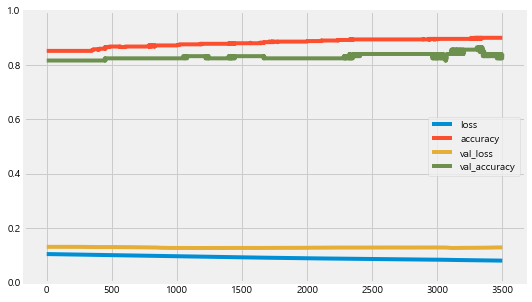

In [87]:
history = model.fit(X_train,y_train,validation_split=.2, epochs=3500, batch_size=500)
#y_vloss = history.history['val_loss']
#y_acc = history.history['accuracy']

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

Epoch 1/3500
1/1 - 0s - loss: 0.0797 - accuracy: 0.8996 - val_loss: 0.1283 - val_accuracy: 0.8400

Epoch 00001: val_loss improved from inf to 0.12834, saving model to C:/Users/아이루디/Downloads/model\01-0.1283.hdf5
Epoch 2/3500
1/1 - 0s - loss: 0.0797 - accuracy: 0.8996 - val_loss: 0.1283 - val_accuracy: 0.8400

Epoch 00002: val_loss improved from 0.12834 to 0.12832, saving model to C:/Users/아이루디/Downloads/model\02-0.1283.hdf5
Epoch 3/3500
1/1 - 0s - loss: 0.0797 - accuracy: 0.8996 - val_loss: 0.1284 - val_accuracy: 0.8240

Epoch 00003: val_loss did not improve from 0.12832
Epoch 4/3500
1/1 - 0s - loss: 0.0797 - accuracy: 0.8996 - val_loss: 0.1284 - val_accuracy: 0.8240

Epoch 00004: val_loss did not improve from 0.12832
Epoch 5/3500
1/1 - 0s - loss: 0.0797 - accuracy: 0.8996 - val_loss: 0.1284 - val_accuracy: 0.8240

Epoch 00005: val_loss did not improve from 0.12832
Epoch 6/3500
1/1 - 0s - loss: 0.0797 - accuracy: 0.8996 - val_loss: 0.1284 - val_accuracy: 0.8240

Epoch 00006: val_loss d


Epoch 00054: val_loss did not improve from 0.12832
Epoch 55/3500
1/1 - 0s - loss: 0.0794 - accuracy: 0.8996 - val_loss: 0.1286 - val_accuracy: 0.8240

Epoch 00055: val_loss did not improve from 0.12832
Epoch 56/3500
1/1 - 0s - loss: 0.0794 - accuracy: 0.8996 - val_loss: 0.1286 - val_accuracy: 0.8240

Epoch 00056: val_loss did not improve from 0.12832
Epoch 57/3500
1/1 - 0s - loss: 0.0794 - accuracy: 0.8996 - val_loss: 0.1286 - val_accuracy: 0.8240

Epoch 00057: val_loss did not improve from 0.12832
Epoch 58/3500
1/1 - 0s - loss: 0.0794 - accuracy: 0.8996 - val_loss: 0.1286 - val_accuracy: 0.8240

Epoch 00058: val_loss did not improve from 0.12832
Epoch 59/3500
1/1 - 0s - loss: 0.0793 - accuracy: 0.8996 - val_loss: 0.1287 - val_accuracy: 0.8400

Epoch 00059: val_loss did not improve from 0.12832
Epoch 60/3500
1/1 - 0s - loss: 0.0793 - accuracy: 0.8996 - val_loss: 0.1287 - val_accuracy: 0.8400

Epoch 00060: val_loss did not improve from 0.12832
Epoch 61/3500
1/1 - 0s - loss: 0.0793 - ac

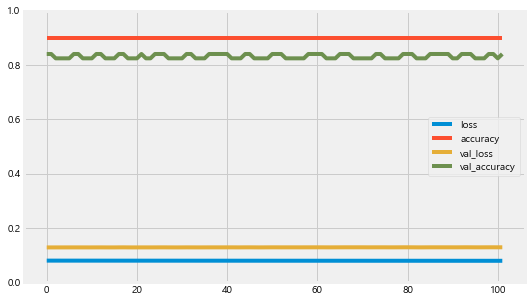

In [97]:
MODEL_DIR = 'C:/Users/아이루디/Downloads/model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)
modelpath="C:/Users/아이루디/Downloads/model/{epoch:02d}-{val_loss:.4f}.hdf5"

checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stop = EarlyStopping(monitor='val_loss',patience=100)
history = model.fit(X_train,y_train,validation_split=.2, epochs=3500, batch_size=500, verbose=2,
                   callbacks=[early_stop,checkpointer])

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()